<a href="https://colab.research.google.com/github/junecv/EAD/blob/main/kaggle_bankruptcy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ingest

In [ ]:
# import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler


In [ ]:
# read data

df = pd.read_csv('https://raw.githubusercontent.com/junecv/bankruptcy/main/data.csv')

### EDA

#### Data Structure

In [ ]:
df.info()

df.describe()
# no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [ ]:
# review distributions of response

df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [ ]:
# assign new col names for ease of referencing
col = ['y']

for i in range(1,96):
  tag = 'X' + str(i)
  col.append(tag)

df.columns = col

# response disribution is 220 : 6599
# split training and validation and test set with stratified method to maintain the balance

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=12)

for train_idx, test_idx in split.split(df, df['y']):
  train = df.loc[train_idx]
  test = df.loc[test_idx]

# apply SMOTE for imbalanced data set

from imblearn.over_sampling import SMOTE

X = train.iloc[:,1:]
y = train['y']

sm = SMOTE(random_state=12)
X_sm , y_sm = sm.fit_resample(X,y)

y.value_counts()
y_sm.value_counts()

0    5279
1     176
Name: y, dtype: int64

0    5279
1    5279
Name: y, dtype: int64

In [ ]:
# assign balanced training set to df
df = pd.concat([y_sm, X_sm], axis=1)

#### Review individual features

In [ ]:
lst1 = []       # list of columns with max <= 1
lst9 = []       # list of columns with max > 1 , from intitial review most are > 9 ditgits

for i in col[1:]:
  if df[i].max() <= 1:
    lst1.append(i)
  else: 
    lst9.append(i)
    pass 

print(lst1)
print(lst9)

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X13', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X31', 'X32', 'X35', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X50', 'X52', 'X54', 'X55', 'X56', 'X57', 'X60', 'X61', 'X62', 'X64', 'X65', 'X66', 'X68', 'X69', 'X70', 'X73', 'X75', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95']
['X11', 'X12', 'X14', 'X21', 'X29', 'X30', 'X33', 'X34', 'X36', 'X46', 'X47', 'X48', 'X49', 'X51', 'X53', 'X58', 'X59', 'X63', 'X67', 'X71', 'X72', 'X74', 'X76', 'X87']


<AxesSubplot:xlabel='X1', ylabel='Density'>

<AxesSubplot:xlabel='X1', ylabel='Density'>

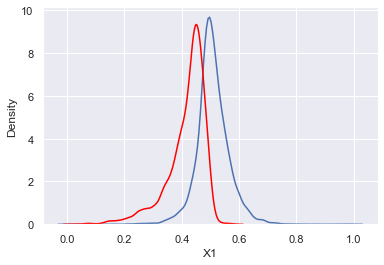

<AxesSubplot:xlabel='X2', ylabel='Density'>

<AxesSubplot:xlabel='X2', ylabel='Density'>

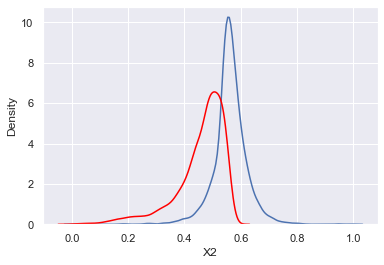

<AxesSubplot:xlabel='X3', ylabel='Density'>

<AxesSubplot:xlabel='X3', ylabel='Density'>

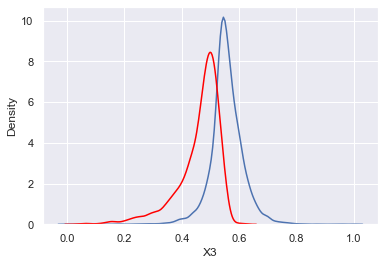

<AxesSubplot:xlabel='X4', ylabel='Density'>

<AxesSubplot:xlabel='X4', ylabel='Density'>

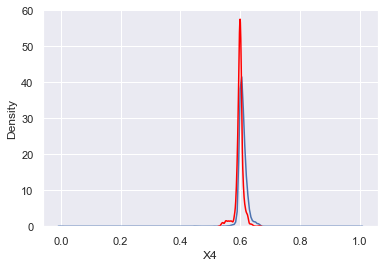

<AxesSubplot:xlabel='X5', ylabel='Density'>

<AxesSubplot:xlabel='X5', ylabel='Density'>

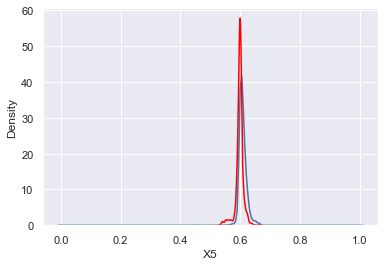

<AxesSubplot:xlabel='X6', ylabel='Density'>

<AxesSubplot:xlabel='X6', ylabel='Density'>

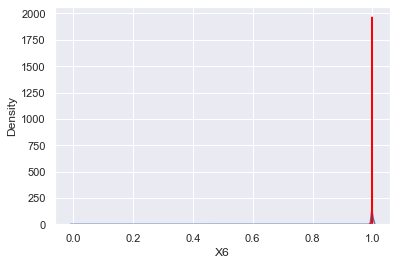

<AxesSubplot:xlabel='X7', ylabel='Density'>

<AxesSubplot:xlabel='X7', ylabel='Density'>

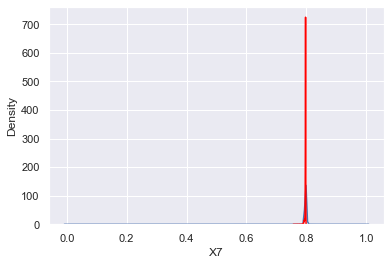

<AxesSubplot:xlabel='X8', ylabel='Density'>

<AxesSubplot:xlabel='X8', ylabel='Density'>

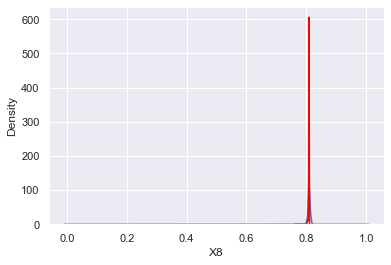

<AxesSubplot:xlabel='X9', ylabel='Density'>

<AxesSubplot:xlabel='X9', ylabel='Density'>

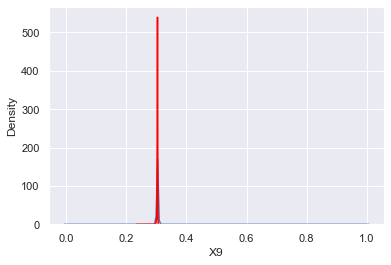

<AxesSubplot:xlabel='X10', ylabel='Density'>

<AxesSubplot:xlabel='X10', ylabel='Density'>

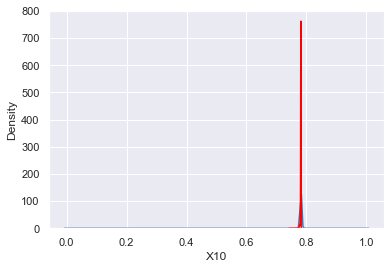

<AxesSubplot:xlabel='X13', ylabel='Density'>

<AxesSubplot:xlabel='X13', ylabel='Density'>

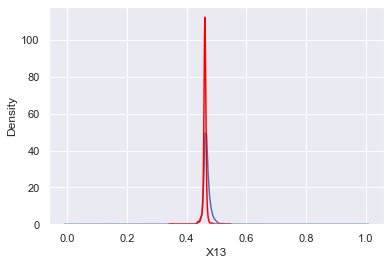

<AxesSubplot:xlabel='X15', ylabel='Density'>

<AxesSubplot:xlabel='X15', ylabel='Density'>

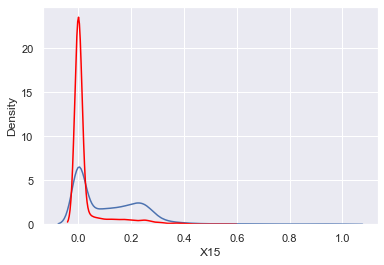

<AxesSubplot:xlabel='X16', ylabel='Density'>

<AxesSubplot:xlabel='X16', ylabel='Density'>

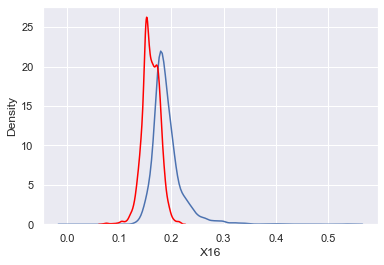

<AxesSubplot:xlabel='X17', ylabel='Density'>

<AxesSubplot:xlabel='X17', ylabel='Density'>

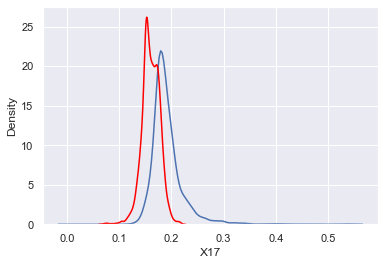

<AxesSubplot:xlabel='X18', ylabel='Density'>

<AxesSubplot:xlabel='X18', ylabel='Density'>

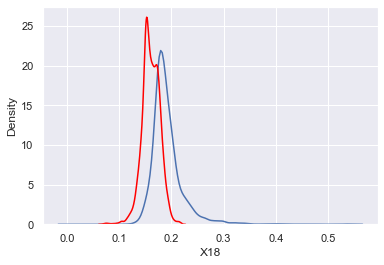

<AxesSubplot:xlabel='X19', ylabel='Density'>

<AxesSubplot:xlabel='X19', ylabel='Density'>

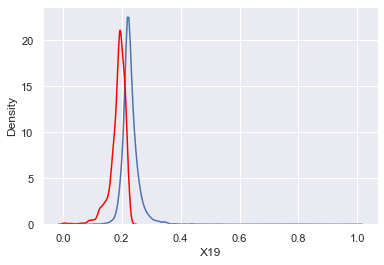

<AxesSubplot:xlabel='X20', ylabel='Density'>

<AxesSubplot:xlabel='X20', ylabel='Density'>

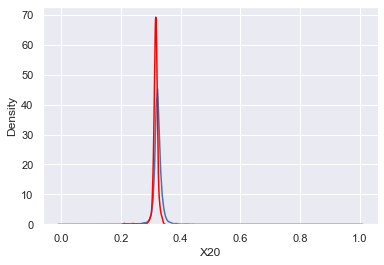

<AxesSubplot:xlabel='X22', ylabel='Density'>

<AxesSubplot:xlabel='X22', ylabel='Density'>

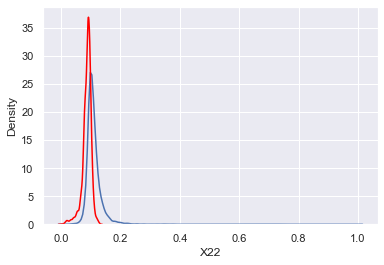

<AxesSubplot:xlabel='X23', ylabel='Density'>

<AxesSubplot:xlabel='X23', ylabel='Density'>

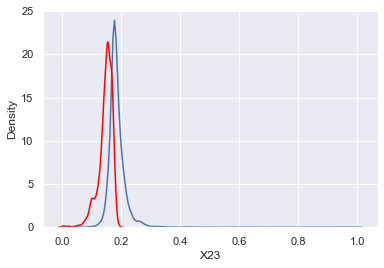

<AxesSubplot:xlabel='X24', ylabel='Density'>

<AxesSubplot:xlabel='X24', ylabel='Density'>

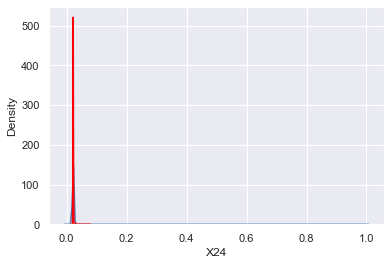

<AxesSubplot:xlabel='X25', ylabel='Density'>

<AxesSubplot:xlabel='X25', ylabel='Density'>

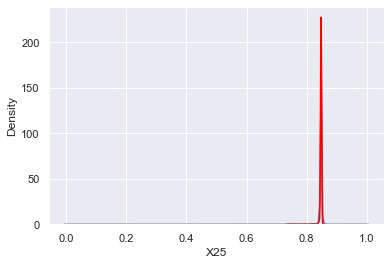

<AxesSubplot:xlabel='X26', ylabel='Density'>

<AxesSubplot:xlabel='X26', ylabel='Density'>

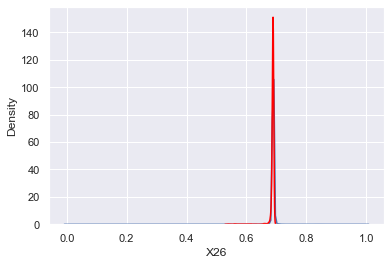

<AxesSubplot:xlabel='X27', ylabel='Density'>

<AxesSubplot:xlabel='X27', ylabel='Density'>

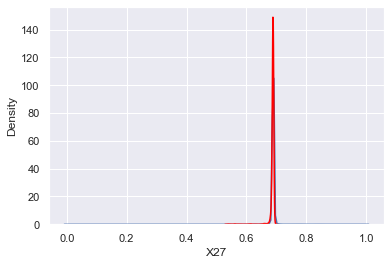

<AxesSubplot:xlabel='X28', ylabel='Density'>

<AxesSubplot:xlabel='X28', ylabel='Density'>

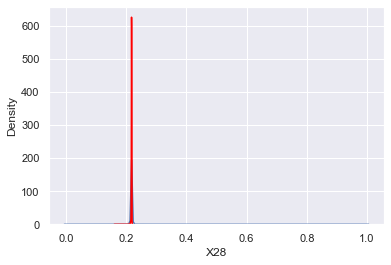

<AxesSubplot:xlabel='X31', ylabel='Density'>

<AxesSubplot:xlabel='X31', ylabel='Density'>

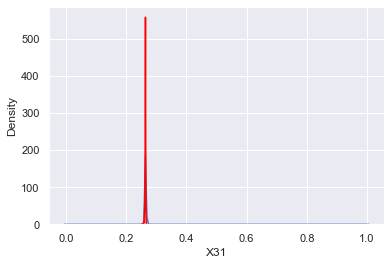

<AxesSubplot:xlabel='X32', ylabel='Density'>

<AxesSubplot:xlabel='X32', ylabel='Density'>

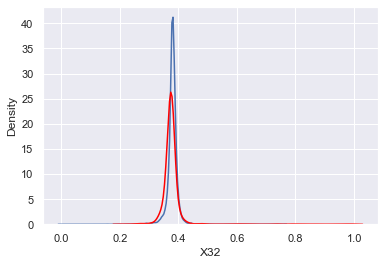

<AxesSubplot:xlabel='X35', ylabel='Density'>

<AxesSubplot:xlabel='X35', ylabel='Density'>

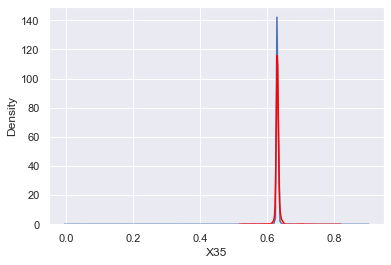

<AxesSubplot:xlabel='X37', ylabel='Density'>

<AxesSubplot:xlabel='X37', ylabel='Density'>

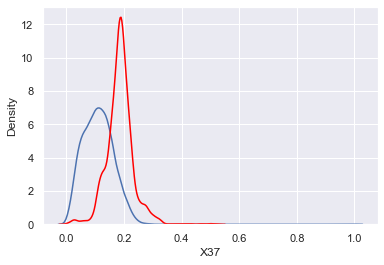

<AxesSubplot:xlabel='X38', ylabel='Density'>

<AxesSubplot:xlabel='X38', ylabel='Density'>

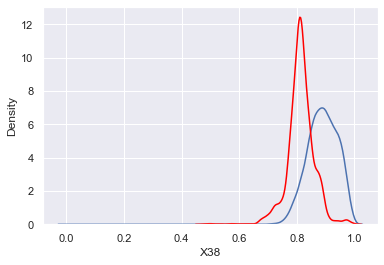

<AxesSubplot:xlabel='X39', ylabel='Density'>

<AxesSubplot:xlabel='X39', ylabel='Density'>

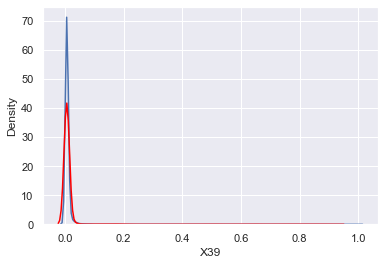

<AxesSubplot:xlabel='X40', ylabel='Density'>

<AxesSubplot:xlabel='X40', ylabel='Density'>

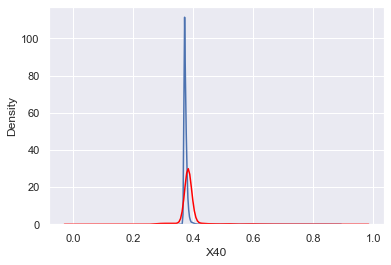

<AxesSubplot:xlabel='X41', ylabel='Density'>

<AxesSubplot:xlabel='X41', ylabel='Density'>

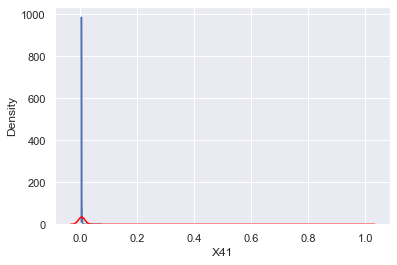

<AxesSubplot:xlabel='X42', ylabel='Density'>

<AxesSubplot:xlabel='X42', ylabel='Density'>

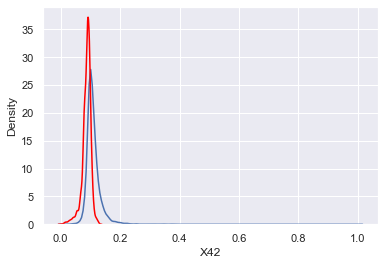

<AxesSubplot:xlabel='X43', ylabel='Density'>

<AxesSubplot:xlabel='X43', ylabel='Density'>

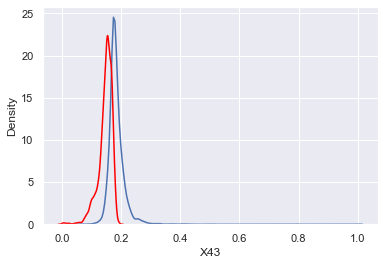

<AxesSubplot:xlabel='X44', ylabel='Density'>

<AxesSubplot:xlabel='X44', ylabel='Density'>

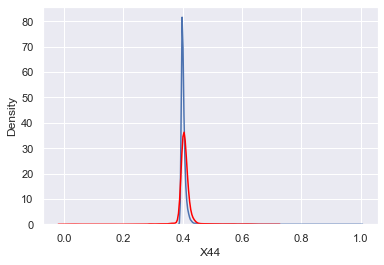

<AxesSubplot:xlabel='X45', ylabel='Density'>

<AxesSubplot:xlabel='X45', ylabel='Density'>

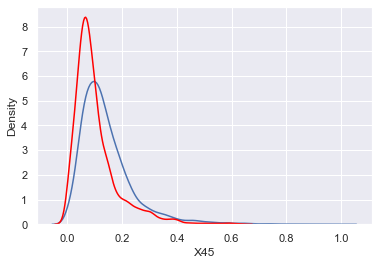

<AxesSubplot:xlabel='X50', ylabel='Density'>

<AxesSubplot:xlabel='X50', ylabel='Density'>

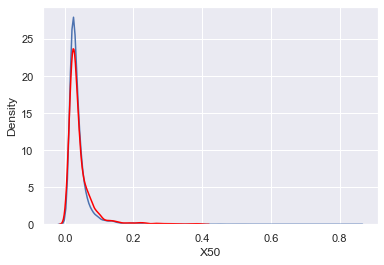

<AxesSubplot:xlabel='X52', ylabel='Density'>

<AxesSubplot:xlabel='X52', ylabel='Density'>

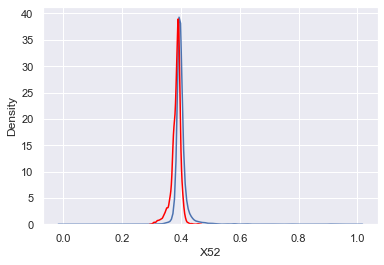

<AxesSubplot:xlabel='X54', ylabel='Density'>

<AxesSubplot:xlabel='X54', ylabel='Density'>

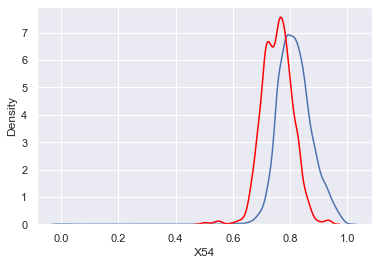

<AxesSubplot:xlabel='X55', ylabel='Density'>

<AxesSubplot:xlabel='X55', ylabel='Density'>

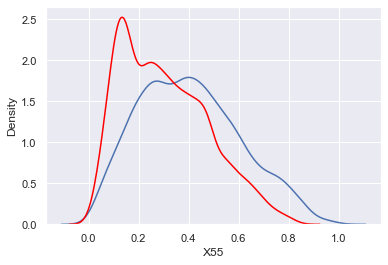

<AxesSubplot:xlabel='X56', ylabel='Density'>

<AxesSubplot:xlabel='X56', ylabel='Density'>

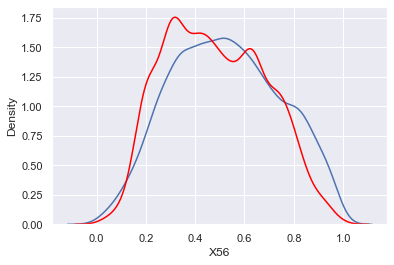

<AxesSubplot:xlabel='X57', ylabel='Density'>

<AxesSubplot:xlabel='X57', ylabel='Density'>

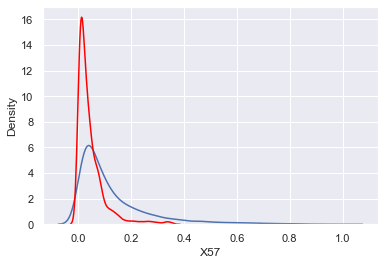

<AxesSubplot:xlabel='X60', ylabel='Density'>

<AxesSubplot:xlabel='X60', ylabel='Density'>

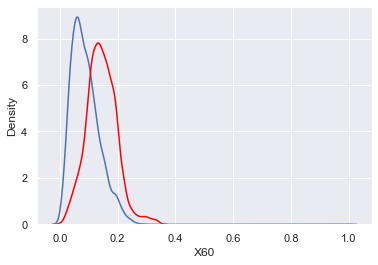

<AxesSubplot:xlabel='X61', ylabel='Density'>

<AxesSubplot:xlabel='X61', ylabel='Density'>

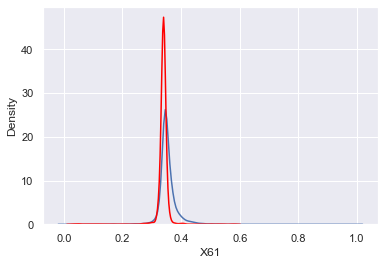

<AxesSubplot:xlabel='X62', ylabel='Density'>

<AxesSubplot:xlabel='X62', ylabel='Density'>

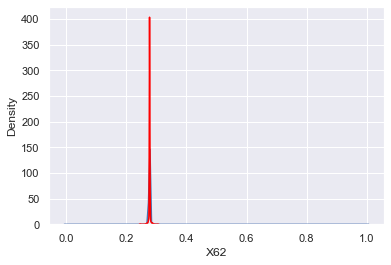

<AxesSubplot:xlabel='X64', ylabel='Density'>

<AxesSubplot:xlabel='X64', ylabel='Density'>

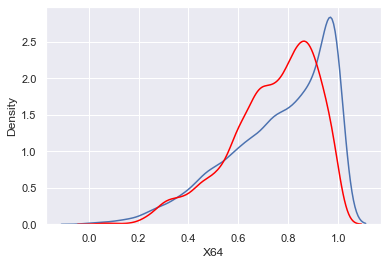

<AxesSubplot:xlabel='X65', ylabel='Density'>

<AxesSubplot:xlabel='X65', ylabel='Density'>

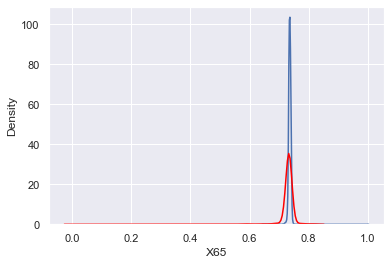

<AxesSubplot:xlabel='X66', ylabel='Density'>

<AxesSubplot:xlabel='X66', ylabel='Density'>

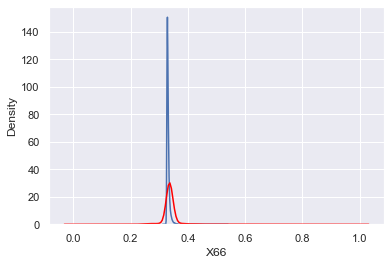

<AxesSubplot:xlabel='X68', ylabel='Density'>

<AxesSubplot:xlabel='X68', ylabel='Density'>

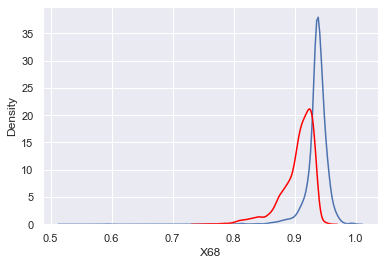

<AxesSubplot:xlabel='X69', ylabel='Density'>

<AxesSubplot:xlabel='X69', ylabel='Density'>

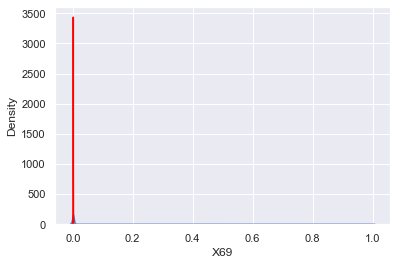

<AxesSubplot:xlabel='X70', ylabel='Density'>

<AxesSubplot:xlabel='X70', ylabel='Density'>

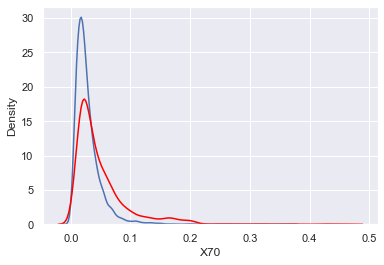

<AxesSubplot:xlabel='X73', ylabel='Density'>

<AxesSubplot:xlabel='X73', ylabel='Density'>

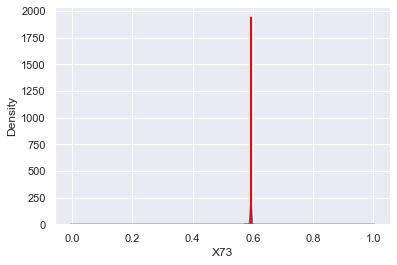

<AxesSubplot:xlabel='X75', ylabel='Density'>

<AxesSubplot:xlabel='X75', ylabel='Density'>

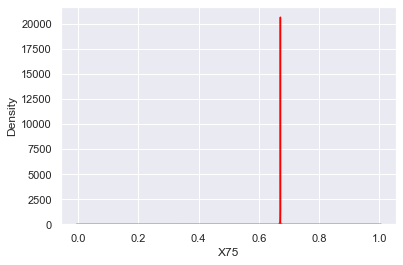

<AxesSubplot:xlabel='X77', ylabel='Density'>

<AxesSubplot:xlabel='X77', ylabel='Density'>

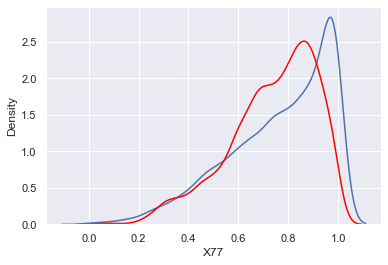

<AxesSubplot:xlabel='X78', ylabel='Density'>

<AxesSubplot:xlabel='X78', ylabel='Density'>

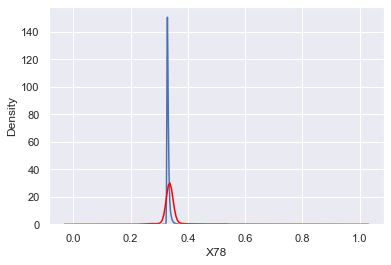

<AxesSubplot:xlabel='X79', ylabel='Density'>

<AxesSubplot:xlabel='X79', ylabel='Density'>

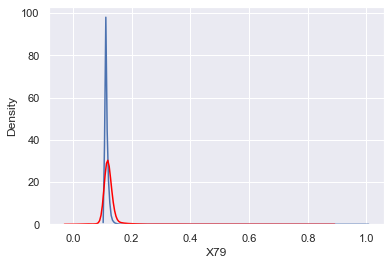

<AxesSubplot:xlabel='X80', ylabel='Density'>

<AxesSubplot:xlabel='X80', ylabel='Density'>

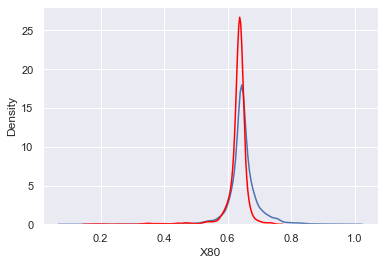

<AxesSubplot:xlabel='X81', ylabel='Density'>

<AxesSubplot:xlabel='X81', ylabel='Density'>

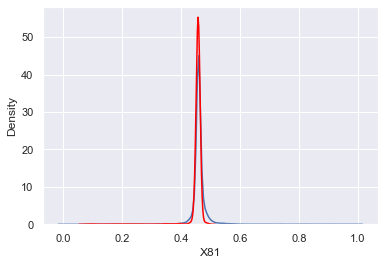

<AxesSubplot:xlabel='X82', ylabel='Density'>

<AxesSubplot:xlabel='X82', ylabel='Density'>

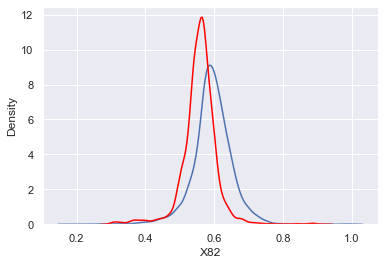

<AxesSubplot:xlabel='X83', ylabel='Density'>

<AxesSubplot:xlabel='X83', ylabel='Density'>

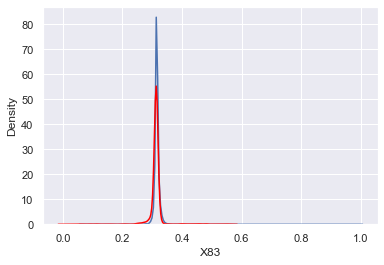

<AxesSubplot:xlabel='X84', ylabel='Density'>

<AxesSubplot:xlabel='X84', ylabel='Density'>

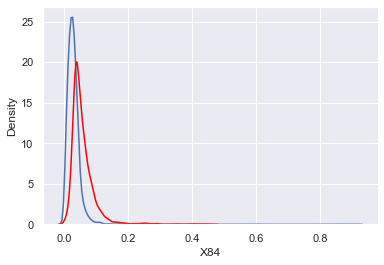

<AxesSubplot:xlabel='X85', ylabel='Density'>

<AxesSubplot:xlabel='X85', ylabel='Density'>

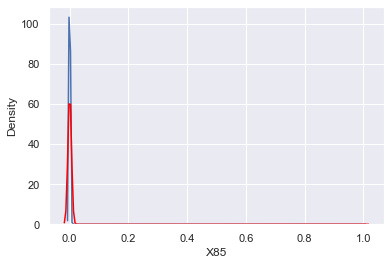

<AxesSubplot:xlabel='X86', ylabel='Density'>

<AxesSubplot:xlabel='X86', ylabel='Density'>

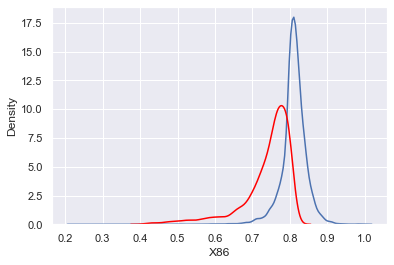

<AxesSubplot:xlabel='X88', ylabel='Density'>

<AxesSubplot:xlabel='X88', ylabel='Density'>

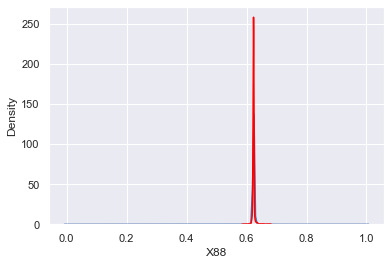

<AxesSubplot:xlabel='X89', ylabel='Density'>

<AxesSubplot:xlabel='X89', ylabel='Density'>

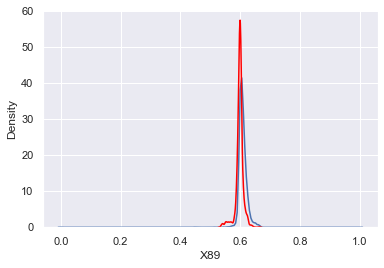

<AxesSubplot:xlabel='X90', ylabel='Density'>

<AxesSubplot:xlabel='X90', ylabel='Density'>

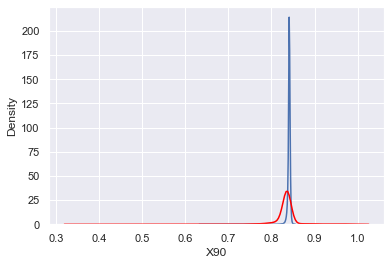

<AxesSubplot:xlabel='X91', ylabel='Density'>

<AxesSubplot:xlabel='X91', ylabel='Density'>

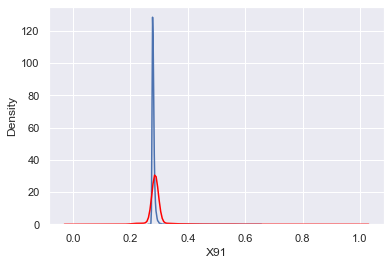

<AxesSubplot:xlabel='X92', ylabel='Density'>

<AxesSubplot:xlabel='X92', ylabel='Density'>

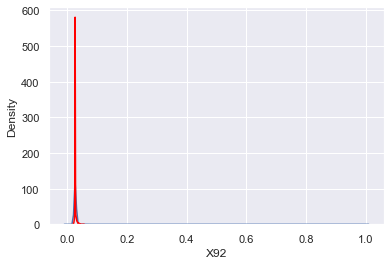

<AxesSubplot:xlabel='X93', ylabel='Density'>

<AxesSubplot:xlabel='X93', ylabel='Density'>

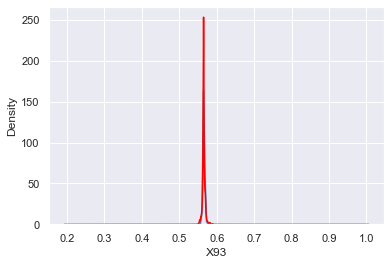

/Users/jc/opt/miniconda3/envs/msds_env/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='X94', ylabel='Density'>

/Users/jc/opt/miniconda3/envs/msds_env/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='X94', ylabel='Density'>

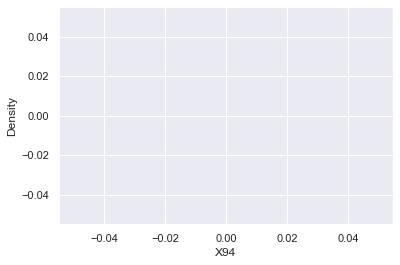

<AxesSubplot:xlabel='X95', ylabel='Density'>

<AxesSubplot:xlabel='X95', ylabel='Density'>

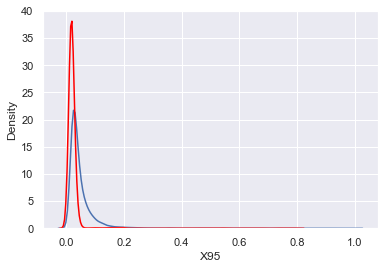

In [ ]:
lst1 = []       # list of columns with max <= 1
lst9 = []       # list of columns with max > 1 , from intitial review most are > 9 ditgits

for i in col[1:]:
  if df[i].max() <= 1:
    sns.kdeplot(data=df.loc[df['y'] == 0], x=i);               
    sns.kdeplot(data=df.loc[df['y'] == 1], x=i, color='red');  
    plt.show()
    lst1.append(i)
  else: 
    lst9.append(i)
    pass 


In [ ]:
# 'X85' and 'X94 should be boolean

df['X85'].value_counts()    # 6811 with 0 ; 8 with 1
df['X94'].value_counts()    # all are 1, no information

# transform X85
df['X85'] = df['X85'].astype('bool')

# df['94'] shall be dropped as feature later

0    10551
1        7
Name: X85, dtype: int64

1    10558
Name: X94, dtype: int64

In [ ]:
# review lst 9 features

temp = pd.DataFrame(df[lst9].describe())
temp = temp.transpose()

# all features in lst9 have min = 0.0 before balancing trainig set 

# 'X67' has both min and 25 percentile = 0 
# 'X29' has 25 percentile the same magnitude as max
# all the rest has extreme diff. bewteen 25% and max
temp.sort_values(by='25%')

# 'X12', 'X29', 'X74' have 50 percentile the same magnitude as max
# all the rest has extreme diff. bewteen 50% and max
# temp.sort_values(by='50%')

# lst9 demonstrates extreme order of magnitude, transform with normalization

,count,mean,std,min,25%,50%,75%,max
X72,10558.0,2.348823e+09,3.347549e+09,0.000000,1.567191e-04,2.901985e-04,5.562538e+09,9.990000e+09
X12,10558.0,1.708283e+09,2.404154e+09,0.000000,1.630364e-04,4.089074e+08,2.840000e+09,9.980000e+09
X71,10558.0,1.189117e+09,2.737617e+09,0.000000,1.636974e-04,2.518939e-04,1.879578e-03,1.000000e+10
X11,10558.0,1.806634e+09,3.099074e+09,0.000000,1.742819e-04,3.353027e-04,2.836849e+09,9.990000e+09
X48,10558.0,2.056017e+09,3.012439e+09,0.000000,2.142087e-04,7.118659e+07,3.990000e+09,9.990000e+09
X14,10558.0,8.801899e+06,7.815800e+07,0.000000,2.740274e-04,4.177098e-04,6.257039e-04,9.900000e+08
X49,10558.0,1.446313e+09,2.758973e+09,0.000000,2.905033e-04,1.067091e-03,9.265629e+08,9.990000e+09
X30,10558.0,1.279480e+07,2.798806e+08,0.000000,3.898017e-04,4.391219e-04,4.719614e-04,9.330000e+09
X67,10558.0,3.445951e+07,4.414055e+08,0.000000,3.901634e-04,4.631908e-03,1.311742e-02,9.540000e+09
X46,10558.0,8.894492e+06,2.107749e+08,0.000000,6.592960e-04,9.650745e-04,1.469024e-03,9.740000e+09


In [ ]:
# transform lst9 features with Normalizer

from sklearn.preprocessing import Normalizer

norm = Normalizer().fit(df[lst9])
lst9_norm = pd.DataFrame(norm.transform(df[lst9].copy()), columns=df[lst9].columns)
lst9_norm.describe()

,X11,X12,X14,X21,X29,X30,X33,X34,X36,X46,...,X53,X58,X59,X63,X67,X71,X72,X74,X76,X87
count,1.055800e+04,1.055800e+04,1.055800e+04,1.055800e+04,1.055800e+04,1.055800e+04,1.055800e+04,1.055800e+04,1.055800e+04,1.055800e+04,...,1.055800e+04,1.055800e+04,1.055800e+04,1.055800e+04,1.055800e+04,1.055800e+04,1.055800e+04,10558.000000,1.055800e+04,1.055800e+04
mean,1.564109e-01,1.587967e-01,1.543571e-03,1.524056e-03,5.246680e-01,1.082419e-03,9.180849e-04,2.767003e-03,1.498070e-03,1.117774e-03,...,1.374674e-03,9.417032e-04,1.386344e-02,5.055333e-03,3.248224e-03,9.455322e-02,1.886873e-01,0.214412,4.593018e-03,2.688921e-03
std,2.616686e-01,2.226174e-01,2.582135e-02,2.675664e-02,2.785721e-01,2.234356e-02,1.592681e-02,4.405186e-02,2.206677e-02,2.356752e-02,...,2.313417e-02,1.750758e-02,7.717563e-02,4.942309e-02,3.951591e-02,2.153433e-01,2.675330e-01,0.233138,5.624974e-02,3.524648e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.577686e-15,0.000000e+00,1.379354e-14,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1.027477e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,8.927411e-15
25%,1.743085e-14,2.085323e-14,2.429731e-14,1.364263e-12,3.840764e-01,3.299228e-14,5.178258e-13,2.514388e-13,4.909821e-13,6.569516e-14,...,5.326792e-13,3.063207e-13,1.047850e-13,2.886422e-13,3.828356e-14,1.574859e-14,1.800686e-14,0.006085,1.141535e-11,1.219225e-13
50%,4.327596e-14,4.424992e-02,4.259065e-14,2.292115e-12,5.415778e-01,4.115537e-14,8.240717e-13,4.691517e-13,1.042398e-12,9.777108e-14,...,1.190454e-12,5.355810e-13,2.778922e-13,5.660719e-13,4.718584e-13,3.048906e-14,5.006637e-14,0.128327,2.475744e-11,3.156240e-13
75%,2.893981e-01,2.566291e-01,6.717015e-14,4.034661e-12,7.068821e-01,5.696438e-14,1.407502e-12,9.494167e-13,1.918399e-12,1.560500e-13,...,2.799738e-12,1.061644e-12,1.003437e-12,1.134904e-12,1.328686e-12,4.639386e-13,4.313352e-01,0.357258,4.232650e-11,9.014903e-13
max,1.000000e+00,1.000000e+00,1.000000e+00,8.487490e-01,1.000000e+00,6.529784e-01,4.966295e-01,9.979026e-01,8.610214e-01,9.920834e-01,...,9.977602e-01,7.718045e-01,9.045574e-01,1.000000e+00,1.000000e+00,9.759793e-01,1.000000e+00,1.000000,9.939660e-01,7.852255e-01


<AxesSubplot:xlabel='X11', ylabel='Density'>

<AxesSubplot:xlabel='X11', ylabel='Density'>

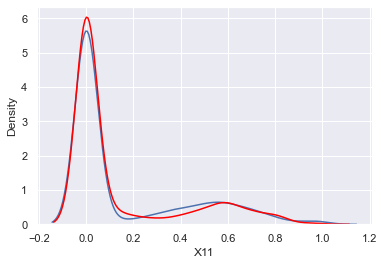

<AxesSubplot:xlabel='X12', ylabel='Density'>

<AxesSubplot:xlabel='X12', ylabel='Density'>

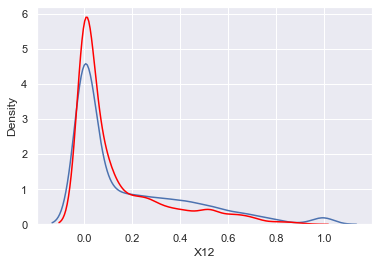

<AxesSubplot:xlabel='X14', ylabel='Density'>

<AxesSubplot:xlabel='X14', ylabel='Density'>

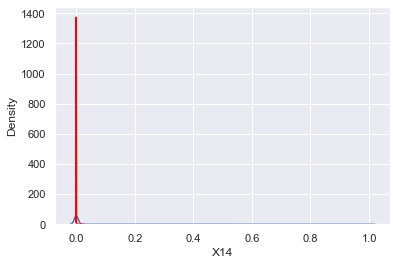

<AxesSubplot:xlabel='X21', ylabel='Density'>

<AxesSubplot:xlabel='X21', ylabel='Density'>

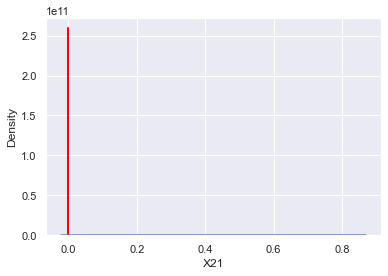

<AxesSubplot:xlabel='X29', ylabel='Density'>

<AxesSubplot:xlabel='X29', ylabel='Density'>

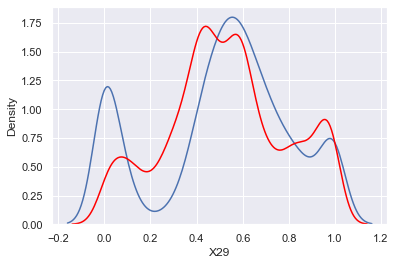

<AxesSubplot:xlabel='X30', ylabel='Density'>

<AxesSubplot:xlabel='X30', ylabel='Density'>

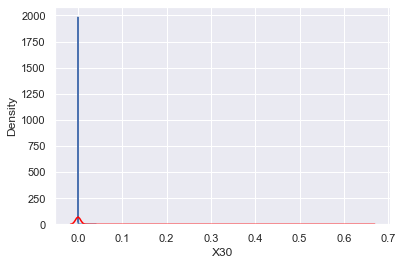

<AxesSubplot:xlabel='X33', ylabel='Density'>

<AxesSubplot:xlabel='X33', ylabel='Density'>

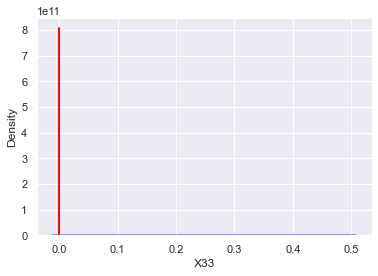

<AxesSubplot:xlabel='X34', ylabel='Density'>

<AxesSubplot:xlabel='X34', ylabel='Density'>

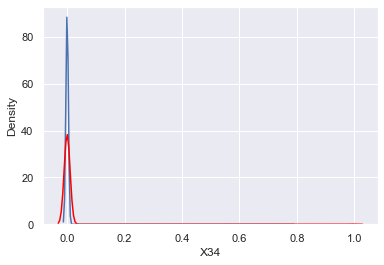

<AxesSubplot:xlabel='X36', ylabel='Density'>

<AxesSubplot:xlabel='X36', ylabel='Density'>

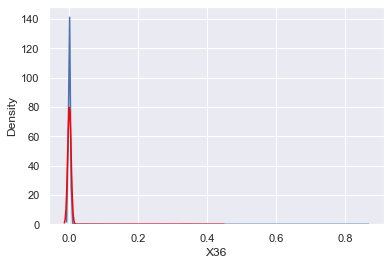

<AxesSubplot:xlabel='X46', ylabel='Density'>

<AxesSubplot:xlabel='X46', ylabel='Density'>

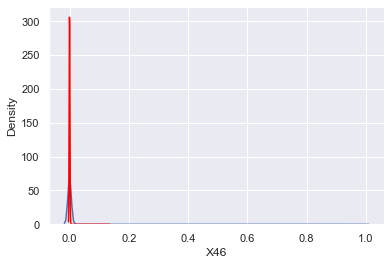

<AxesSubplot:xlabel='X47', ylabel='Density'>

<AxesSubplot:xlabel='X47', ylabel='Density'>

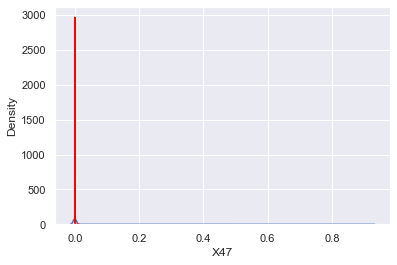

<AxesSubplot:xlabel='X48', ylabel='Density'>

<AxesSubplot:xlabel='X48', ylabel='Density'>

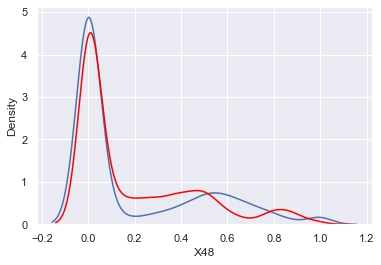

<AxesSubplot:xlabel='X49', ylabel='Density'>

<AxesSubplot:xlabel='X49', ylabel='Density'>

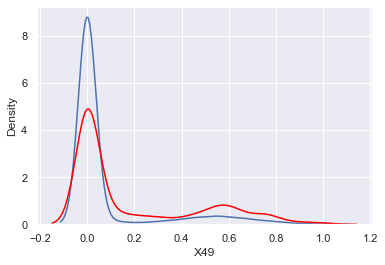

<AxesSubplot:xlabel='X51', ylabel='Density'>

<AxesSubplot:xlabel='X51', ylabel='Density'>

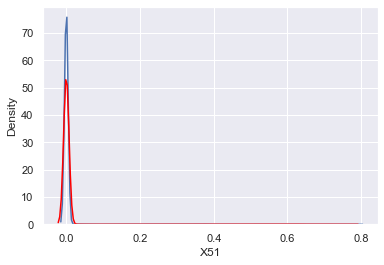

<AxesSubplot:xlabel='X53', ylabel='Density'>

<AxesSubplot:xlabel='X53', ylabel='Density'>

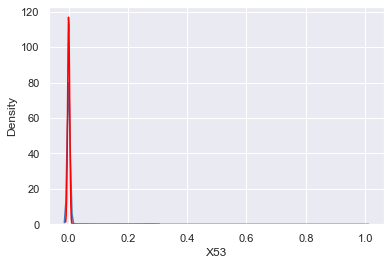

<AxesSubplot:xlabel='X58', ylabel='Density'>

<AxesSubplot:xlabel='X58', ylabel='Density'>

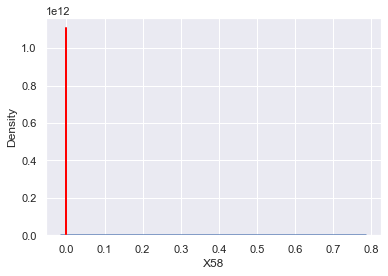

<AxesSubplot:xlabel='X59', ylabel='Density'>

<AxesSubplot:xlabel='X59', ylabel='Density'>

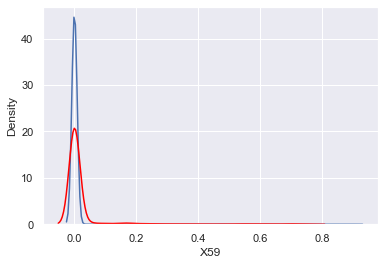

<AxesSubplot:xlabel='X63', ylabel='Density'>

<AxesSubplot:xlabel='X63', ylabel='Density'>

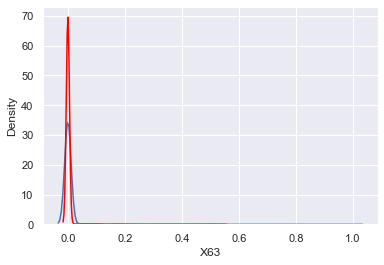

<AxesSubplot:xlabel='X67', ylabel='Density'>

<AxesSubplot:xlabel='X67', ylabel='Density'>

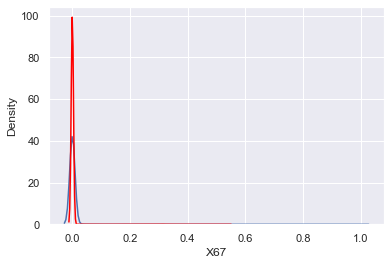

<AxesSubplot:xlabel='X71', ylabel='Density'>

<AxesSubplot:xlabel='X71', ylabel='Density'>

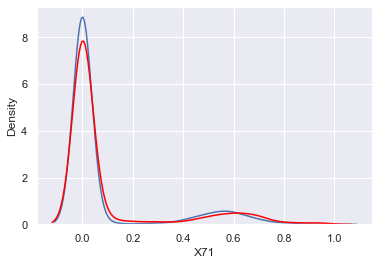

<AxesSubplot:xlabel='X72', ylabel='Density'>

<AxesSubplot:xlabel='X72', ylabel='Density'>

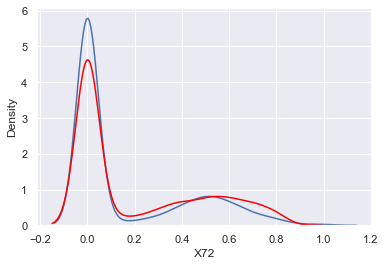

<AxesSubplot:xlabel='X74', ylabel='Density'>

<AxesSubplot:xlabel='X74', ylabel='Density'>

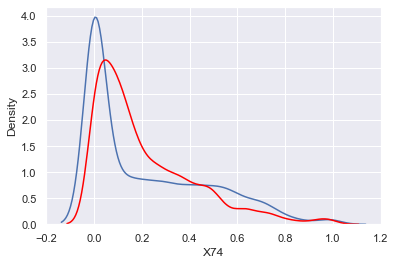

<AxesSubplot:xlabel='X76', ylabel='Density'>

<AxesSubplot:xlabel='X76', ylabel='Density'>

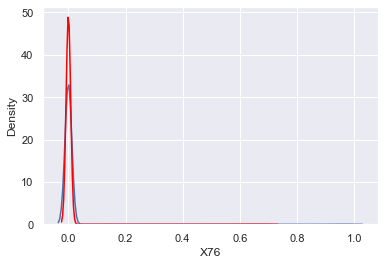

<AxesSubplot:xlabel='X87', ylabel='Density'>

<AxesSubplot:xlabel='X87', ylabel='Density'>

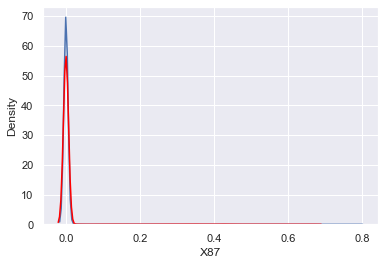

In [ ]:
# visualize lst9_norm features

lst9_norm['y'] = df['y']

for i in lst9_norm.columns[:-1]:
  sns.kdeplot(data=lst9_norm[lst9_norm['y'] == 0], x=i);
  sns.kdeplot(data=lst9_norm[lst9_norm['y'] == 1], x=i, color='red');
  plt.show()
  lst1.append(i)

# replace original lst9 values with normalized values

lst9_norm.index = df.index
df[lst9] = lst9_norm.iloc[:,:-1]

#### Feature Drop List 

In [ ]:
# initial drop list of lst1 as visualization reveal
# X94 carries no information
# X25, X75 two groups (1 vs 0) looks almost identical 

droplst = ['X94', 'X25', 'X27']

# drop lst9 as well
# droplst.extend(lst9)

#### Review features relationships

In [ ]:
# create feature list for review
features = [i for i in df.columns if i not in droplst]
features.remove('y')

# length of features
len(features)

92

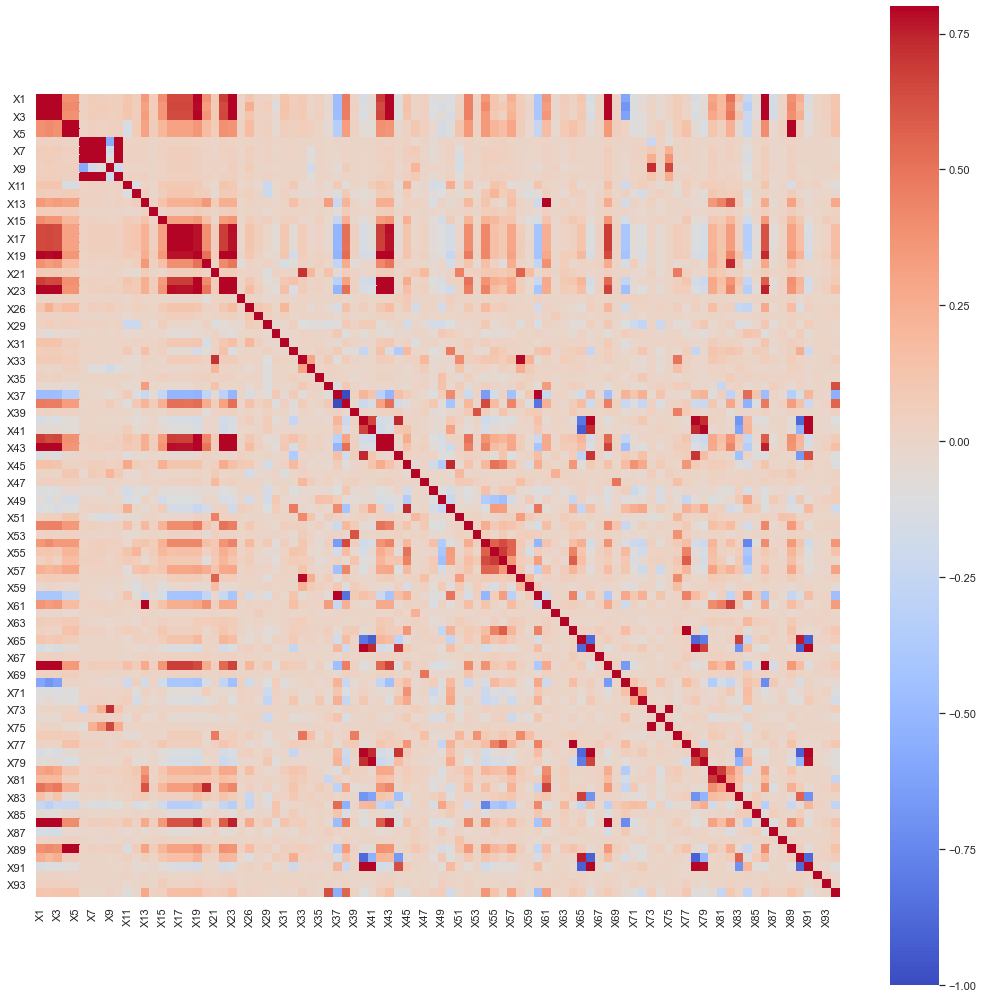

In [ ]:
# create heatmap to examine their correlations
corr = df[features].corr()
plt.subplots(figsize=(18, 18))
sns.heatmap(corr, vmax=.8, square=True, annot=False, cmap='coolwarm');

X1     1.000000
X3     0.992564
X2     0.941491
X86    0.893059
X19    0.833897
         ...   
X87   -0.147151
X84   -0.234736
X60   -0.400074
X37   -0.470216
X70   -0.606037
Name: X1, Length: 92, dtype: float64

<AxesSubplot:xlabel='X1', ylabel='Density'>

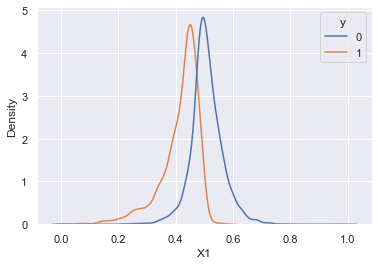

<AxesSubplot:xlabel='X2', ylabel='Density'>

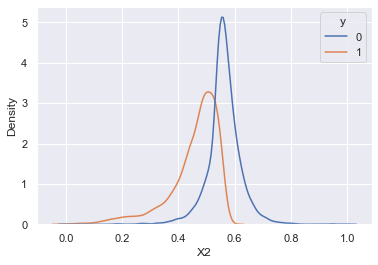

<AxesSubplot:xlabel='X3', ylabel='Density'>

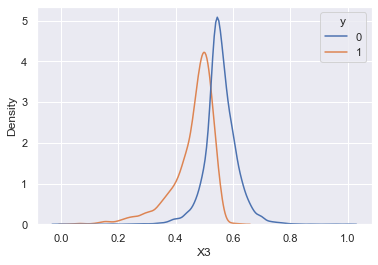

<AxesSubplot:xlabel='X86', ylabel='Density'>

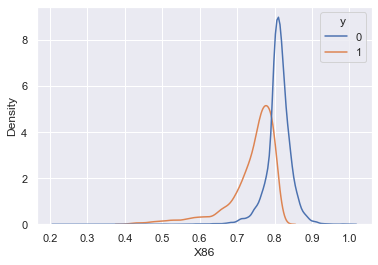

<AxesSubplot:ylabel='Density'>

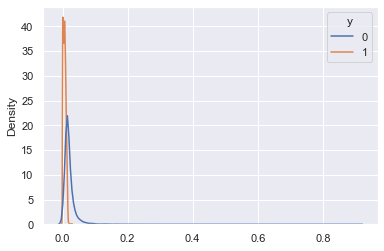

In [ ]:
# review corr by groups

# X1, X2, X3 
corr.iloc[:,0].sort_values(ascending=False)

# X1 & X3 are almost identical
# X2 is 0.96 correlated with X86
# explore compounding all 4
sns.kdeplot(data=df, x=(df['X1']), hue='y');
plt.show()
sns.kdeplot(data=df, x=(df['X2']), hue='y');
plt.show()
sns.kdeplot(data=df, x=(df['X3']), hue='y');
plt.show()
sns.kdeplot(data=df, x=(df['X86']), hue='y');
plt.show()
sns.kdeplot(data=df, x=(df['X1']**2 * df['X2']**2 * df['X3']**2 * df['X86']**2), hue='y')    
#X86 is included due to 0.96 correlation with X2 and 0.9 correlation with X3

# create new feature to capture all 4
df['N1'] = (df['X1']**2 * df['X2']**2 * df['X3']**2 * df['X86']**2)

,X4,X5
X4,1.000000,0.999574
X89,1.000000,0.999574
X5,0.999574,1.000000
X2,0.420136,0.418382
X86,0.402479,0.400809
...,...,...
X11,-0.140851,-0.141692
X49,-0.156031,-0.155664
X84,-0.233290,-0.232904
X60,-0.241144,-0.240781


<AxesSubplot:xlabel='X4', ylabel='Density'>

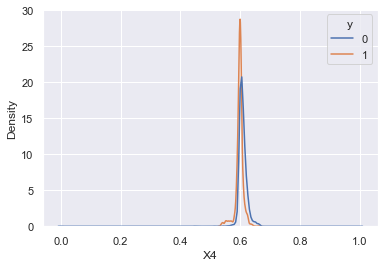

<AxesSubplot:xlabel='X5', ylabel='Density'>

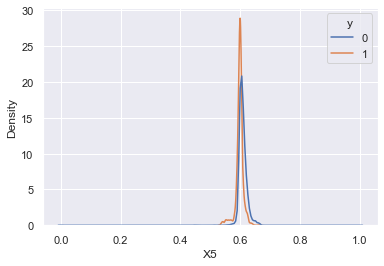

<AxesSubplot:xlabel='X89', ylabel='Density'>

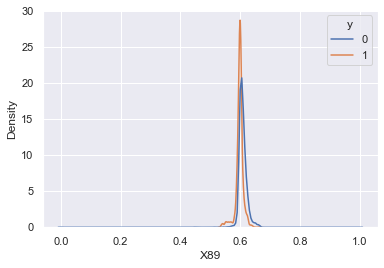

<AxesSubplot:ylabel='Density'>

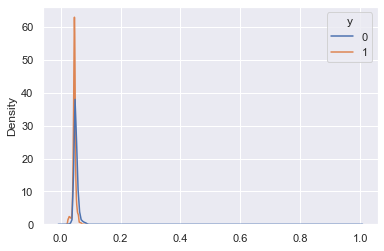

In [ ]:
# review corr by groups

# X4, X5
corr.iloc[:,3:5].sort_values(by='X4', ascending=False)

# X4 and X89 are identical, X4 and X5 are almost identical
# explore compounding all 3
sns.kdeplot(data=df, x=(df['X4']), hue='y');
plt.show()
sns.kdeplot(data=df, x=(df['X5']), hue='y');
plt.show()
sns.kdeplot(data=df, x=(df['X89']), hue='y');
plt.show()
sns.kdeplot(data=df, x=(df['X4'] * df['X5'] * df['X89'])**2, hue='y')


# create new feature to capture all 3
df['N2'] = (df['X4'] * df['X5'] * df['X89'])**2

,X7,X8,X9,X10
X7,1.000000,0.984197,-0.182941,0.993308
X10,0.993308,0.982360,-0.194808,1.000000
X8,0.984197,1.000000,-0.077056,0.982360
X6,0.910110,0.852318,-0.573869,0.909538
X75,0.231454,0.374605,0.658917,0.252510
...,...,...,...,...
X48,-0.047632,-0.044196,0.014724,-0.048666
X51,-0.085341,-0.141718,-0.140423,-0.067555
X34,-0.092383,-0.081522,-0.180409,-0.089811
X84,-0.112314,-0.131107,-0.096170,-0.103410


<AxesSubplot:xlabel='X7', ylabel='Density'>

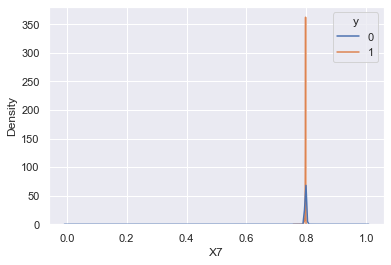

<AxesSubplot:xlabel='X8', ylabel='Density'>

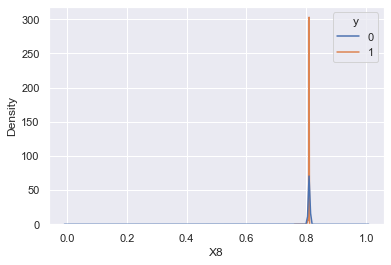

<AxesSubplot:xlabel='X9', ylabel='Density'>

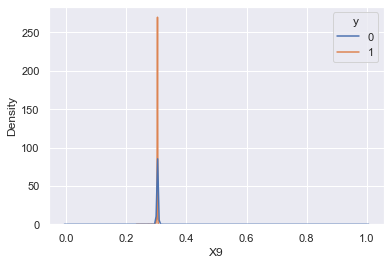

<AxesSubplot:xlabel='X10', ylabel='Density'>

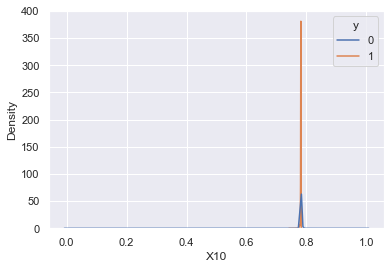

<AxesSubplot:ylabel='Density'>

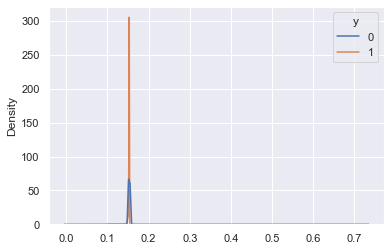

In [ ]:
# review corr by groups

# X7, X8, X9, X10
corr.iloc[:,6:10].sort_values(by='X7', ascending=False)

# X7, X8, X9 and X10 are almost identical
# explore compounding all 4
sns.kdeplot(data=df, x=(df['X7']), hue='y');
plt.show()
sns.kdeplot(data=df, x=(df['X8']), hue='y');
plt.show()
sns.kdeplot(data=df, x=(df['X9']), hue='y');
plt.show()
sns.kdeplot(data=df, x=(df['X10']), hue='y');
plt.show()
sns.kdeplot(data=df, x=(df['X7'] * df['X8'] * df['X9'] * df['X10']), hue='y')

# create new feature to capture all 4
df['N3'] = df['X7'] * df['X8'] * df['X9'] * df['X10']

X11    1.000000
X45    0.276166
X50    0.254259
X68    0.147307
X52    0.146857
         ...   
X89   -0.140860
X5    -0.141692
X48   -0.174914
X70   -0.200668
X29   -0.217239
Name: X11, Length: 92, dtype: float64

<AxesSubplot:xlabel='X13', ylabel='Density'>

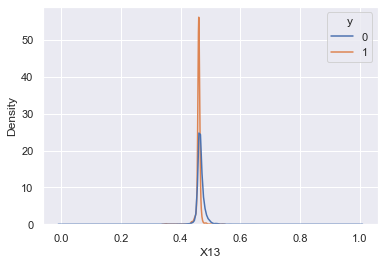

<AxesSubplot:xlabel='X61', ylabel='Density'>

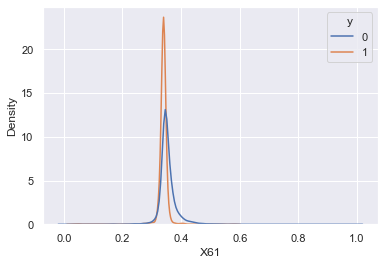

/Users/jc/opt/miniconda3/envs/msds_env/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Density'>

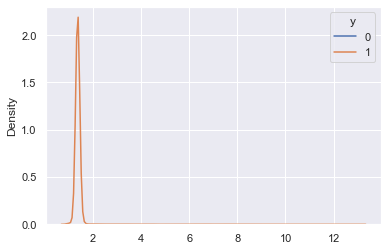

In [ ]:
# review corr by groups

# X13
corr.iloc[:,10].sort_values(ascending=False)

# X13 and X61 are almost identical
# explore compounding all 2
sns.kdeplot(data=df, x=(df['X13']), hue='y');
plt.show()
sns.kdeplot(data=df, x=(df['X61']), hue='y');
plt.show()
sns.kdeplot(data=df, x=(df['X13'] / df['X61']), hue='y')

# create new feature to capture both
df['N4'] = df['X13'] * df['X61']

X13    1.000000
X61    0.909109
X82    0.616283
X81    0.445269
X20    0.354401
         ...   
X84   -0.100489
X48   -0.122624
X70   -0.174165
X60   -0.195816
X37   -0.222330
Name: X13, Length: 92, dtype: float64

<AxesSubplot:xlabel='X16', ylabel='Density'>

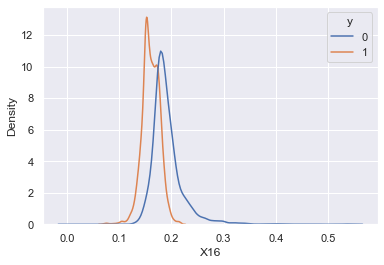

<AxesSubplot:xlabel='X17', ylabel='Density'>

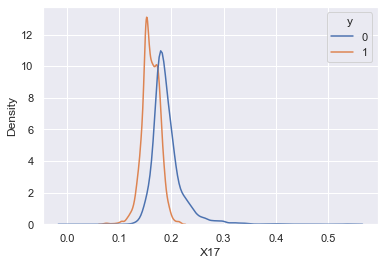

<AxesSubplot:xlabel='X18', ylabel='Density'>

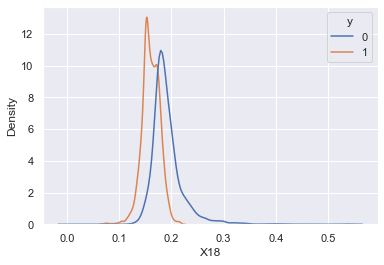

<AxesSubplot:ylabel='Density'>

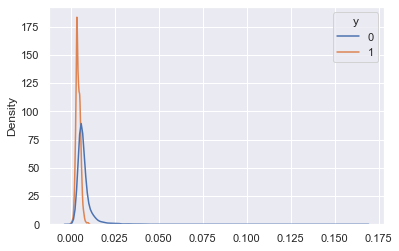

In [ ]:
# review corr by groups

# X16 ~ X18
corr.iloc[:,12].sort_values(ascending=False)

# X16, X17 and X18 are almost identical
# explore compounding all 3
sns.kdeplot(data=df, x=(df['X16']), hue='y');
plt.show()
sns.kdeplot(data=df, x=(df['X17']), hue='y');
plt.show()
sns.kdeplot(data=df, x=(df['X18']), hue='y');
plt.show()
sns.kdeplot(data=df, x=(df['X16'] * df['X17'] * df['X18']), hue='y')

# # create new feature to capture both
df['N5'] = df['X16'] * df['X17'] * df['X18']

X16    1.000000
X17    0.999040
X18    0.998654
X43    0.779574
X23    0.779012
         ...   
X50   -0.157062
X84   -0.333815
X70   -0.401879
X60   -0.420628
X37   -0.511785
Name: X16, Length: 92, dtype: float64

<AxesSubplot:xlabel='X19', ylabel='Density'>

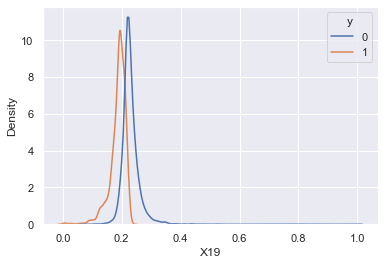

<AxesSubplot:xlabel='X23', ylabel='Density'>

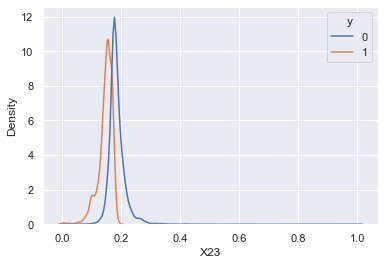

<AxesSubplot:xlabel='X43', ylabel='Density'>

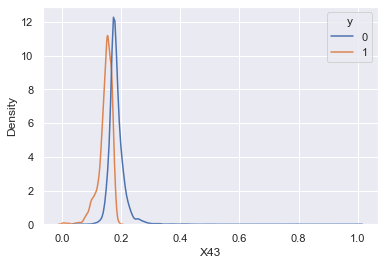

<AxesSubplot:ylabel='Density'>

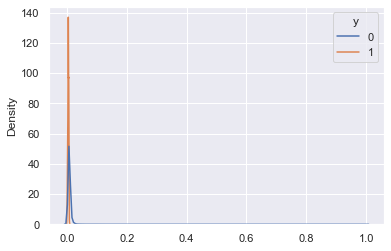

In [ ]:
# review corr by groups

# X19
corr.iloc[:,15].sort_values(ascending=False)

# X19, X23 and X43 are very close
# explore compounding all 3
sns.kdeplot(data=df, x=(df['X19']), hue='y');
plt.show()
sns.kdeplot(data=df, x=(df['X23']), hue='y');
plt.show()
sns.kdeplot(data=df, x=(df['X43']), hue='y');
plt.show()
sns.kdeplot(data=df, x=(df['X19'] * df['X23'] * df['X43']), hue='y')

# # create new feature to capture both
df['N6'] = df['X19'] * df['X23'] * df['X43']

X19    1.000000
X43    0.975926
X23    0.971850
X1     0.833897
X3     0.823709
         ...   
X50   -0.238592
X84   -0.299506
X60   -0.424756
X70   -0.430228
X37   -0.527269
Name: X19, Length: 92, dtype: float64

<AxesSubplot:xlabel='X22', ylabel='Density'>

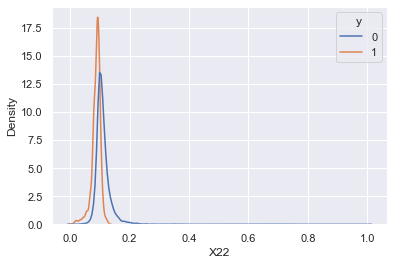

<AxesSubplot:xlabel='X42', ylabel='Density'>

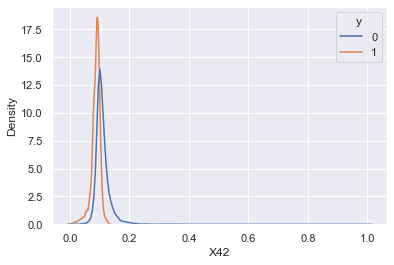

<AxesSubplot:ylabel='Density'>

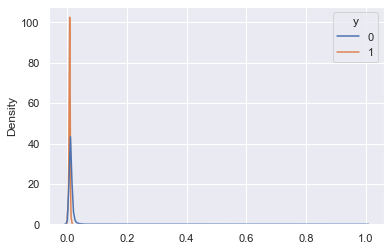

In [ ]:
# review corr by groups

# X22
corr.iloc[:,18].sort_values(ascending=False)

# X22 and X42 are very close
# explore compounding all 2
sns.kdeplot(data=df, x=(df['X22']), hue='y');
plt.show()
sns.kdeplot(data=df, x=(df['X42']), hue='y');
plt.show()
sns.kdeplot(data=df, x=(df['X22'] * df['X42']), hue='y')

# create new feature to capture both
df['N7'] = df['X22'] * df['X42']

X22    1.000000
X42    0.998918
X43    0.830478
X23    0.829378
X19    0.815155
         ...   
X79   -0.214051
X60   -0.220882
X70   -0.258739
X84   -0.260084
X37   -0.310570
Name: X22, Length: 92, dtype: float64

<AxesSubplot:xlabel='X25', ylabel='Density'>

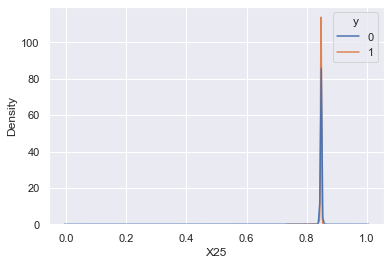

<AxesSubplot:xlabel='X26', ylabel='Density'>

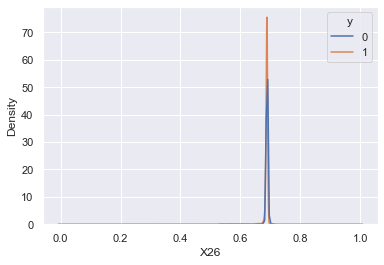

<AxesSubplot:xlabel='X27', ylabel='Density'>

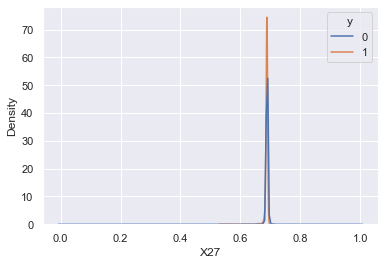

<AxesSubplot:ylabel='Density'>

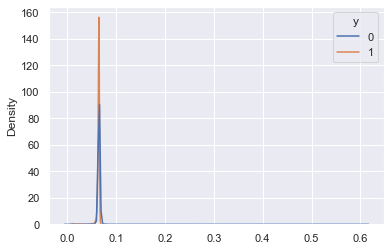

In [ ]:
# review corr by groups

# X25 ~ X27
corr.iloc[:,21].sort_values(ascending=False)

# X25, X26 and X27 are very close
# explore compounding all 3
sns.kdeplot(data=df, x=(df['X25']), hue='y');
plt.show()
sns.kdeplot(data=df, x=(df['X26']), hue='y');
plt.show()
sns.kdeplot(data=df, x=(df['X27']), hue='y');
plt.show()
sns.kdeplot(data=df, x=(df['X25'] *  df['X26'] * df['X27'])**3, hue='y')

# create new feature to capture both
df['N8'] = (df['X25'] *  df['X26'] * df['X27'])**3

X30    1.000000
X84    0.130915
X85    0.106292
X49    0.096280
X37    0.093664
         ...   
X68   -0.082049
X79   -0.091713
X38   -0.093664
X2    -0.095030
X86   -0.096791
Name: X30, Length: 92, dtype: float64

<AxesSubplot:xlabel='X33', ylabel='Density'>

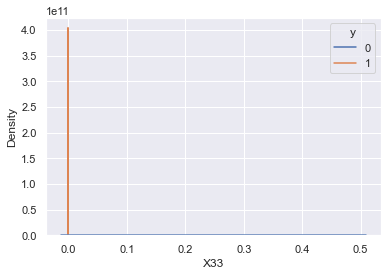

<AxesSubplot:xlabel='X58', ylabel='Density'>

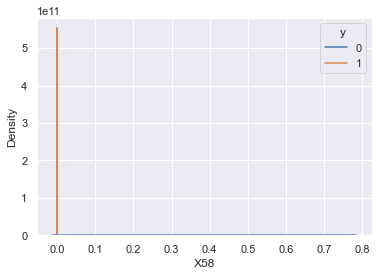

<AxesSubplot:ylabel='Density'>

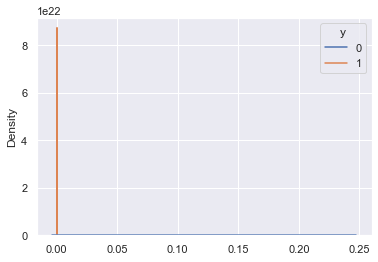

In [ ]:
# review corr by groups

# X33
corr.iloc[:,27].sort_values(ascending=False)

# X33, X58 are very close
# explore compounding all 2
sns.kdeplot(data=df, x=(df['X33']), hue='y');
plt.show()
sns.kdeplot(data=df, x=(df['X58']), hue='y');
plt.show()
sns.kdeplot(data=df, x=(df['X33'] * df['X58']), hue='y')

# create new feature to capture both
df['N9'] = df['X33'] * df['X58']

X35    1.000000
X49    0.140329
X72    0.096970
X82    0.061318
X32    0.045552
         ...   
X39   -0.041418
X51   -0.049734
X54   -0.057460
X56   -0.059565
X29   -0.080422
Name: X35, Length: 92, dtype: float64

<AxesSubplot:xlabel='X40', ylabel='Density'>

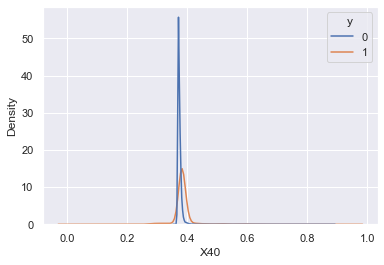

<AxesSubplot:xlabel='X66', ylabel='Density'>

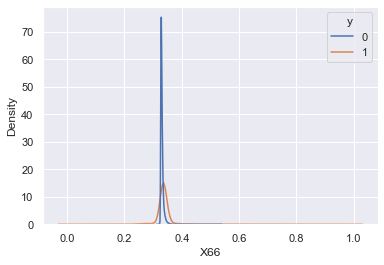

<AxesSubplot:xlabel='X78', ylabel='Density'>

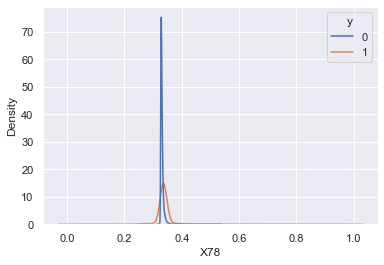

<AxesSubplot:xlabel='X91', ylabel='Density'>

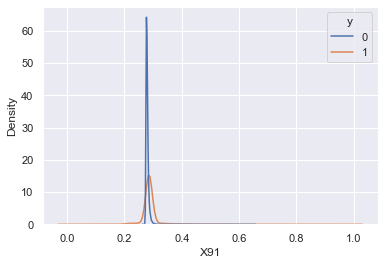

<AxesSubplot:ylabel='Density'>

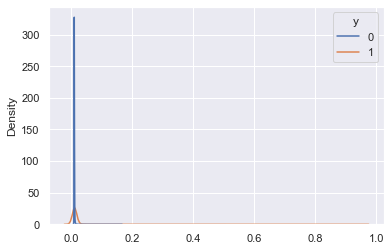

In [ ]:
# review corr by groups

# X40
corr.iloc[:,32].sort_values(ascending=False)

# X40, X91, X66, X78 are very close
# explore compounding all 4
sns.kdeplot(data=df, x=(df['X40']), hue='y');
plt.show()
sns.kdeplot(data=df, x=(df['X66']), hue='y');
plt.show()
sns.kdeplot(data=df, x=(df['X78']), hue='y');
plt.show()
sns.kdeplot(data=df, x=(df['X91']), hue='y');
plt.show()
sns.kdeplot(data=df, x=(df['X40'] * df['X66'] * df['X78'] * df['X91']), hue='y')

# # create new feature to capture both
df['N10'] = df['X40'] * df['X66'] * df['X78'] * df['X91']

X51    1.000000
X21    0.453026
X33    0.411168
X58    0.330925
X76    0.205434
         ...   
X10   -0.067555
X73   -0.080765
X7    -0.085341
X9    -0.140423
X8    -0.141718
Name: X51, Length: 92, dtype: float64

<AxesSubplot:xlabel='X64', ylabel='Density'>

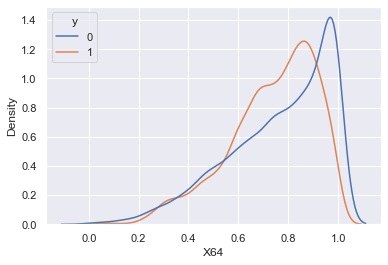

<AxesSubplot:xlabel='X77', ylabel='Density'>

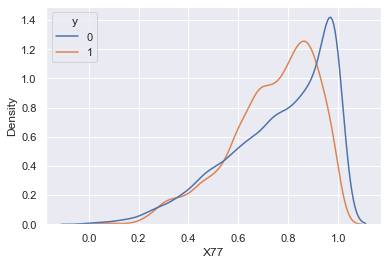

<AxesSubplot:ylabel='Density'>

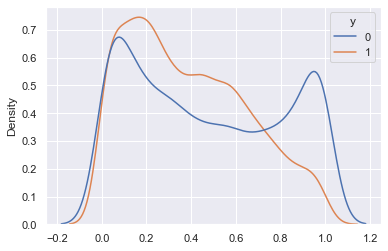

In [ ]:
# review corr by groups

# X64
corr.iloc[:,48].sort_values(ascending=False)

# X64, X77 are identical
# explore compounding all 2
sns.kdeplot(data=df, x=(df['X64']), hue='y');
plt.show()
sns.kdeplot(data=df, x=(df['X77']), hue='y');
plt.show()
sns.kdeplot(data=df, x=(df['X64'] * df['X77'])**2, hue='y')

# create new feature to capture both
df['N11'] = (df['X64'] * df['X77'])**2

#### New Features

In [ ]:
# Upon above review, below groups of features seem to clearly seperate 1 vs 0

# New features :
# N1: 'X1', 'X2', 'X3', 
# N2: '4','5', '89'
# N3: '7','8','9','10'
# N4: 13,61
# N5: 16,17,18
# N6: 19,23,43
# N7: 22, 42
# N8: 25,26,27
# N9: 33, 58
# N10: 40,66,78,91
# N11: 64,77

#### Outliers

In [ ]:
# find outliers
# after reviewing model performances, outliers are better not to be removed

out = []

for i in col[1:]:
    df['q'] = abs(zscore(df[i]))
    a = df[df['q'] > 300].index
    out.extend(a)

df = df.drop('q', axis=1)

out = list(set(out))
len(out)

0

#### Feature selections

In [ ]:
# check features

df.columns[1:]

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       ...
       'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N11'],
      dtype='object', length=106)

In [ ]:
# explore features

featureset = [i for i in df.columns[1:] if i not in droplst]
featureset_cv_score = pd.DataFrame(columns=['i', 'score', 'score_mean'])

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score

for i in featureset:
  X = df[[i]]
  y = df['y']
  log = LogisticRegression()
  log.fit(X,y)
  pred = log.predict(X)
  score = cross_val_score(log, X, y, cv=10, scoring='f1')
  a = pd.Series([i, score, score.mean()], index=featureset_cv_score.columns)
  featureset_cv_score = featureset_cv_score.append(a, ignore_index=True)
  

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

In [ ]:
featureset_cv_score.sort_values(by='score_mean', ascending=False)[:50]

# featureset_cv_score.sort_values(by='score_mean', ascending=False).iloc[22,1]

,i,score,score_mean
97,N6,"[0.8427454387489139, 0.844559585492228, 0.8283...",0.834727
92,N1,"[0.8384879725085912, 0.836424957841484, 0.8226...",0.828723
18,X19,"[0.8299319727891157, 0.8405797101449276, 0.838...",0.824403
0,X1,"[0.796477495107632, 0.8347659980897804, 0.8141...",0.810273
40,X43,"[0.814453125, 0.825242718446602, 0.82454458293...",0.809420
22,X23,"[0.812928501469148, 0.825242718446602, 0.82454...",0.808532
2,X3,"[0.7960591133004925, 0.8376560999039385, 0.808...",0.807511
34,X37,"[0.8228782287822879, 0.8091743119266055, 0.809...",0.806561
35,X38,"[0.8228782287822879, 0.8091743119266055, 0.809...",0.806561
83,X86,"[0.7910750507099392, 0.8060301507537689, 0.789...",0.786608


In [ ]:
# create featuresets to be used:

lst = list(featureset_cv_score[featureset_cv_score['score_mean'] >= 0.7]['i'])
featureset = lst

# featureset = [i for i in df.columns[1:] if i not in droplst]
len(featureset)

34

### Modeling

#### Base Model - Logistics Regression

In [ ]:
from sklearn.linear_model import LogisticRegression 

# Prepare training set

X = df.drop(out, axis=0)[featureset]
y = df.drop(out, axis=0)['y']

# fit logistics regression model
log = LogisticRegression()
log.fit(X,y)

# make predictions
pred = pd.DataFrame(log.predict_proba(X))
pred = pred[1]

LogisticRegression()

Logistic Regression: ROC AUC=0.949


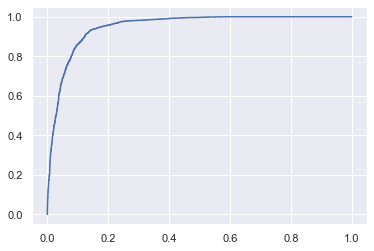

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import f1_score

# calculate scores
auc = roc_auc_score(y, pred)

# sumerize scores
print('Logistic Regression: ROC AUC=%.3f' % (auc))

# calculate roc curves
fpr, tpr, _ = roc_curve(y, pred)

# plot the roc curve for the model
pyplot.plot(fpr, tpr)

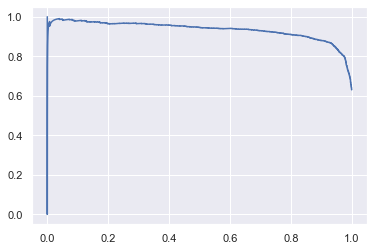

In [ ]:
from sklearn.metrics import precision_recall_curve

# recall-precision plot
precision, recall, _ = precision_recall_curve(y, pred)
pyplot.plot(recall, precision)

In [ ]:
# Perform CV

from sklearn.model_selection import cross_val_score
score = cross_val_score(log, X, y, cv=10, scoring='f1')
print('CV score =' , score , 'CV score mean = ', score.mean())

CV score = [0.89833641 0.90892364 0.89604416 0.89459212 0.88301887 0.89112534
 0.88868275 0.89502762 0.88847584 0.9037037 ] CV score mean =  0.8947930453946423


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# fine tunning for the best trade-offs

for i in np.linspace(0,0.1, 11):
  pred_threshold = (pred >= (i+0.4))
  print(i+0.4)
  print(confusion_matrix(y, pred_threshold))
  print(classification_report(y, pred_threshold))


0.4
[[4343  936]
 [ 268 5011]]
              precision    recall  f1-score   support

           0       0.94      0.82      0.88      5279
           1       0.84      0.95      0.89      5279

    accuracy                           0.89     10558
   macro avg       0.89      0.89      0.89     10558
weighted avg       0.89      0.89      0.89     10558

0.41000000000000003
[[4372  907]
 [ 280 4999]]
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      5279
           1       0.85      0.95      0.89      5279

    accuracy                           0.89     10558
   macro avg       0.89      0.89      0.89     10558
weighted avg       0.89      0.89      0.89     10558

0.42000000000000004
[[4396  883]
 [ 291 4988]]
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      5279
           1       0.85      0.94      0.89      5279

    accuracy                           0.89     10558
   

In [ ]:
# coef = pd.DataFrame(log.coef_)
# coef = coef.transpose()
# coef.index = X.columns
# coef.sort_values(by=0,ascending=False)

Base model with threshold = 0.48 is proposed, as it's more important to recall bankcrupt banks.

```
0.48000000000000004
[[4543  736]
 [ 384 4895]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      5279
           1       0.87      0.93      0.90      5279

    accuracy                           0.89     10558
   macro avg       0.90      0.89      0.89     10558
weighted avg       0.90      0.89      0.89     10558

```



#### Naive Base Model (GaussianNB / MultinomialNB)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# Prepare training set

X = df.drop(out, axis=0)[featureset]
y = df.drop(out, axis=0)['y']

# fit NB model
gnb = GaussianNB()
gnb.fit(X,y)

mnb = MultinomialNB()
mnb.fit(X,y)

GaussianNB()

MultinomialNB()

ROC AUC=0.929


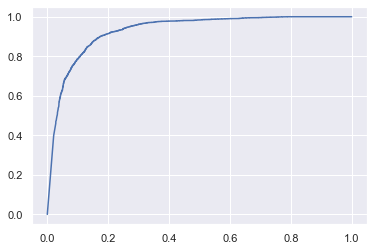

In [ ]:
# review gnb
# review how the model predict on X
pred = pd.DataFrame(gnb.predict_proba(X))
pred = pred[1]

# calculate scores
auc = roc_auc_score(y, pred)

# sumerize scores
print('ROC AUC=%.3f' % (auc))

# calculate roc curves
fpr, tpr, _ = roc_curve(y, pred)

# plot the roc curve for the model
pyplot.plot(fpr, tpr)

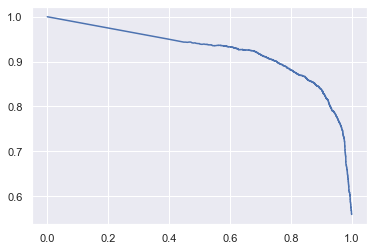

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y, pred)
pyplot.plot(recall, precision)

In [ ]:
# Perform CV

from sklearn.model_selection import cross_val_score

score = cross_val_score(gnb, X, y, cv=10, scoring='f1')
print('CV score =' , score , 'CV score mean = ', score.mean())

CV score = [0.86264217 0.85617597 0.85178876 0.85690093 0.85639687 0.85012701
 0.85312225 0.8559464  0.85234899 0.86792453] CV score mean =  0.856337388009643


ROC AUC=0.899


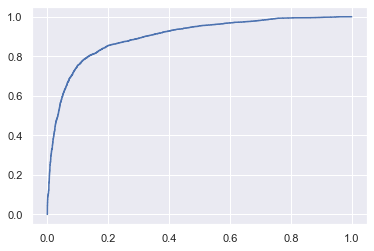

In [ ]:
# mnb

# review how the model predict on X
pred = pd.DataFrame(mnb.predict_proba(X))
pred = pred[1]

# calculate scores
auc = roc_auc_score(y, pred)

# sumerize scores
print('ROC AUC=%.3f' % (auc))

# calculate roc curves
fpr, tpr, _ = roc_curve(y, pred)

# plot the roc curve for the model
pyplot.plot(fpr, tpr)

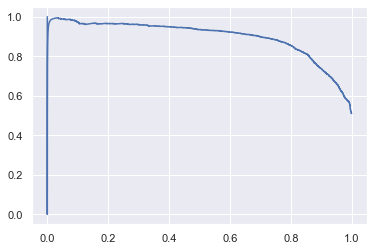

In [ ]:
# plot recall-precision 

precision, recall, _ = precision_recall_curve(y, pred)
pyplot.plot(recall, precision)

In [ ]:
# Perform CV

from sklearn.model_selection import cross_val_score

score = cross_val_score(mnb, X, y, cv=10, scoring='f1')
print('CV score =' , score , 'CV score mean = ', score.mean())

CV score = [0.8312611  0.83626761 0.8097385  0.8139738  0.8119349  0.80981595
 0.79964695 0.81539808 0.82488889 0.83568905] CV score mean =  0.8188614825675158


#### SVM

In [ ]:
from sklearn.svm import SVC

# Prepare training set

X = df.drop(out, axis=0)[featureset]
y = df.drop(out, axis=0)['y']

# fit SVM model
svc = SVC(kernel='linear')
svc.fit(X,y)

# review how the model predict on X
pred = pd.DataFrame(svc.predict(X))
print(confusion_matrix(y, pred))
print(classification_report(y, pred))

SVC(kernel='linear')

[[4537  742]
 [ 341 4938]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      5279
           1       0.87      0.94      0.90      5279

    accuracy                           0.90     10558
   macro avg       0.90      0.90      0.90     10558
weighted avg       0.90      0.90      0.90     10558



In [ ]:
# Perform CV

from sklearn.model_selection import cross_val_score

score = cross_val_score(svc, X, y, cv=10, scoring='f1')
print('CV score =' , score , 'CV score mean = ', score.mean())

CV score = [0.8992674  0.90545455 0.8969918  0.90217391 0.88909599 0.89392566
 0.90009166 0.89918256 0.90246126 0.90493601] CV score mean =  0.8993580796352557


In [ ]:
# a = pd.DataFrame()
# a['features'] = featureset
# a['coef'] = np.transpose(svc.coef_)
# a.sort_values(by='coef')

##### SVM Model Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}
grid = GridSearchCV(SVC(kernel='linear'),param_grid,refit=True,verbose=2, scoring='f1')
grid.fit(X,y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   2.0s
[CV] END .....................................C=0.1, gamma=1; total time=   2.0s
[CV] END .....................................C=0.1, gamma=1; total time=   1.9s
[CV] END .....................................C=0.1, gamma=1; total time=   1.9s
[CV] END .....................................C=0.1, gamma=1; total time=   2.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   2.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.9s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.9s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.9s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.9s
[CV] END ..................................C=0.1, gamma=0.01; total time=   1.9s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             scoring='f1', verbose=2)

In [ ]:
grid.best_estimator_
grid.best_score_

SVC(C=100, gamma=1, kernel='linear')

0.9087195853877787

In [ ]:
# refit SVM model
svc = grid.best_estimator_
svc.fit(X,y)

SVC(C=100, gamma=1, kernel='linear')

In [ ]:
from sklearn.metrics import classification_report

grid_pred = grid.best_estimator_.predict(X)
print(confusion_matrix(y,grid_pred))
print(classification_report(y,grid_pred))    #Output

[[4620  659]
 [ 318 4961]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.90      5279
           1       0.88      0.94      0.91      5279

    accuracy                           0.91     10558
   macro avg       0.91      0.91      0.91     10558
weighted avg       0.91      0.91      0.91     10558



In [ ]:
grid.__dict__

{'scoring': 'f1',
 'estimator': SVC(kernel='linear'),
 'n_jobs': None,
 'refit': True,
 'cv': None,
 'verbose': 2,
 'pre_dispatch': '2*n_jobs',
 'error_score': nan,
 'return_train_score': False,
 'param_grid': {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
 'multimetric_': False,
 'best_index_': 12,
 'best_score_': 0.9087195853877787,
 'best_params_': {'C': 100, 'gamma': 1},
 'best_estimator_': SVC(C=100, gamma=1, kernel='linear'),
 'refit_time_': 2.353611946105957,
 'scorer_': make_scorer(f1_score, average=binary),
 'cv_results_': {'mean_fit_time': array([1.6066442 , 1.59407887, 1.61824861, 1.61993275, 1.25070229,
         1.25143127, 1.2693368 , 1.24270058, 1.171556  , 1.19728241,
         1.18778157, 1.18900657, 1.4407517 , 1.46320534, 1.45093112,
         1.44748526]),
  'std_fit_time': array([0.01546332, 0.01178767, 0.01615487, 0.01459296, 0.01091841,
         0.00921907, 0.02510639, 0.00312645, 0.02152427, 0.03140927,
         0.02169287, 0.02498   , 0.02813838, 0.0441

#### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Prepare training set

X = df.drop(out, axis=0)[featureset]
y = df.drop(out, axis=0)['y']

# fit RandomForest model
rf = RandomForestClassifier()
rf.fit(X,y)

# review how the model predict on X
pred = pd.DataFrame(rf.predict(X))
print(confusion_matrix(y, pred))
print(classification_report(y, pred))

/Users/jc/opt/miniconda3/envs/msds_env/lib/python3.9/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


RandomForestClassifier()

[[5279    0]
 [   0 5279]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5279
           1       1.00      1.00      1.00      5279

    accuracy                           1.00     10558
   macro avg       1.00      1.00      1.00     10558
weighted avg       1.00      1.00      1.00     10558



In [ ]:
# Perform CV

from sklearn.model_selection import cross_val_score

score = cross_val_score(rf, X, y, cv=10, scoring='f1')
print('CV score =' , score , 'CV score mean = ', score.mean())

CV score = [0.96200185 0.97217069 0.96869245 0.96228151 0.97014925 0.96303142
 0.96750232 0.96487985 0.96014829 0.97026022] CV score mean =  0.9661117857027428


##### Random Forest Tuning

In [ ]:
# from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [10, 50, 100], 'criterion': ['gini', 'entropy'],
              'max_depth': [10, 50, 100], 'max_features': ['sqrt', 'log2']}
grid = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=2, scoring='f1')
grid.fit(X,y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=20; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=20; total time=   0.4s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=20; total time=   0.4s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=20; total time=   0.4s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=20; total time=   0.3

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 34],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 20, 34]},
             scoring='f1', verbose=2)

In [ ]:
grid.best_estimator_
grid.best_score_

RandomForestClassifier(criterion='entropy', max_depth=34, max_features='sqrt',
                       n_estimators=34)

0.9648341160628281

In [ ]:
# refit RandomForest model
# rf = grid.best_estimator_
# rf.fit(X,y)

# no refitting as f1 score after grid serach is not better than initial model

#### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Prepare training set

X = df.drop(out, axis=0)[featureset]
y = df.drop(out, axis=0)['y']

# fit GB model
gb = GradientBoostingClassifier()
gb.fit(X,y)

# review how the model predict on X
pred = pd.DataFrame(gb.predict_proba(X))
pred = pred[1]

# print(confusion_matrix(y, pred))
# print(classification_report(y, pred))

GradientBoostingClassifier()

ROC AUC=0.989


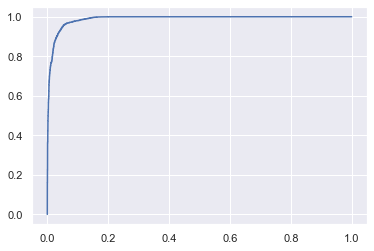

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import f1_score

# calculate scores
auc = roc_auc_score(y, pred)

# sumerize scores
print('ROC AUC=%.3f' % (auc))

# calculate roc curves
fpr, tpr, _ = roc_curve(y, pred)

# plot the roc curve for the model
pyplot.plot(fpr, tpr)

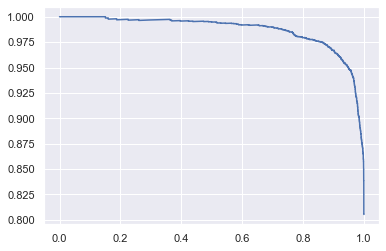

In [ ]:
from sklearn.metrics import precision_recall_curve

# recall-precision plot
precision, recall, _ = precision_recall_curve(y, pred)
pyplot.plot(recall, precision)

In [ ]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(gb, X, y, cv=10, scoring='f1')
print('CV score =' , score , 'CV score mean = ', score.mean())

CV score = [0.92804428 0.95229186 0.94225481 0.93394495 0.9255121  0.93370166
 0.94095941 0.93370166 0.93419833 0.94599628] CV score mean =  0.9370605344411274


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# fine tunning for the best trade-offs

for i in np.linspace(0,0.1, 11):
  pred_threshold = (pred >= (i+0.4))
  print(i+0.4)
  print(confusion_matrix(y, pred_threshold))
  print(classification_report(y, pred_threshold))

0.4
[[4776  503]
 [ 109 5170]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      5279
           1       0.91      0.98      0.94      5279

    accuracy                           0.94     10558
   macro avg       0.94      0.94      0.94     10558
weighted avg       0.94      0.94      0.94     10558

0.41000000000000003
[[4795  484]
 [ 111 5168]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      5279
           1       0.91      0.98      0.95      5279

    accuracy                           0.94     10558
   macro avg       0.95      0.94      0.94     10558
weighted avg       0.95      0.94      0.94     10558

0.42000000000000004
[[4807  472]
 [ 119 5160]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      5279
           1       0.92      0.98      0.95      5279

    accuracy                           0.94     10558
   

##### Gradient Boosting tuning

In [ ]:
# tuning 

param_grid = {'max_features': ['sqrt', 'log2']}
grid = GridSearchCV(GradientBoostingClassifier(),param_grid,refit=True,verbose=2, scoring='f1')
grid.fit(X,y)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ..................................max_features=sqrt; total time=   1.0s
[CV] END ..................................max_features=sqrt; total time=   1.0s
[CV] END ..................................max_features=sqrt; total time=   1.0s
[CV] END ..................................max_features=sqrt; total time=   1.0s
[CV] END ..................................max_features=sqrt; total time=   1.0s
[CV] END ..................................max_features=log2; total time=   1.0s
[CV] END ..................................max_features=log2; total time=   1.0s
[CV] END ..................................max_features=log2; total time=   1.0s
[CV] END ..................................max_features=log2; total time=   1.0s
[CV] END ..................................max_features=log2; total time=   1.0s


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_features': ['sqrt', 'log2']}, scoring='f1',
             verbose=2)

In [ ]:
grid.best_estimator_
grid.best_score_

GradientBoostingClassifier(max_features='log2')

0.9315086303111902

In [ ]:
# refit GB model
# gb = grid.best_estimator_
# gb.fit(X,y)

GradientBoostingClassifier(max_depth=34, max_features='log2', n_estimators=34)

#### Extra Trees

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Prepare training set

X = df.drop(out, axis=0)[featureset]
y = df.drop(out, axis=0)['y']

# fit ExtraTree model
et = ExtraTreesClassifier()
et.fit(X,y)

# review how the model predict on X
pred = pd.DataFrame(et.predict(X))
print(confusion_matrix(y, pred))
print(classification_report(y, pred))

ExtraTreesClassifier()

[[5279    0]
 [   0 5279]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5279
           1       1.00      1.00      1.00      5279

    accuracy                           1.00     10558
   macro avg       1.00      1.00      1.00     10558
weighted avg       1.00      1.00      1.00     10558



In [ ]:
# Perform CV

from sklearn.model_selection import cross_val_score

score = cross_val_score(et, X, y, cv=10, scoring='f1')
print('CV score =' , score , 'CV score mean = ', score.mean())

CV score = [0.96500921 0.97383178 0.97317299 0.96235078 0.97493036 0.96863469
 0.96774194 0.9640553  0.97132285 0.96941613] CV score mean =  0.969046601105398


##### Extra Trees Tuning

In [ ]:
param_grid = {'n_estimators': [10, 20, 34], 'max_depth': [10, 20, 34], 'max_features': ['sqrt', 'log2']}
grid = GridSearchCV(GradientBoostingClassifier(),param_grid,refit=True,verbose=2, scoring='f1')
grid.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.4s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.4s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.4s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.4s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.4s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=20; total time=   0.7s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=20; total time=   0.7s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=20; total time=   0.7s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=20; total time=   0.7s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=20; total time=   0.7s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=34; total time=   1.3s
[CV] END ...max_depth=10, max_features=sqrt, n_e

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [10, 20, 34],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 20, 34]},
             scoring='f1', verbose=2)

In [ ]:
grid.best_estimator_
grid.best_score_

GradientBoostingClassifier(max_depth=20, max_features='sqrt', n_estimators=34)

0.9696477083199527

In [ ]:
# refit ExtraTree model
et = grid.best_estimator_
et.fit(X,y)

GradientBoostingClassifier(max_depth=20, max_features='sqrt', n_estimators=34)

#### Model Selection

After reviewing AOC / ROC curve, as well as f1 scores for Logistics Regression and two Naive Base Models, it is found that Logistics regression model performs better than both Native Base Models.

Even before finetuning hyperparameters, the SVC performs better than Logistic Regression in specificity (given the same level of sensitivity). 

Grid Serach for SCV shows that as long as C = 10, it does not matter for value of gamma, at least between 1 to 0.001.

In [ ]:
# prepare test set

# transformation

# transform X85
test['X85'] = test['X85'].astype('bool')

# new features
test['N1'] = (test['X1']**2 * test['X2']**2 * test['X3']**2 * test['X86']**2)
test['N2'] = (test['X4'] * test['X5'] * test['X89'])**2
test['N3'] = test['X7'] * test['X8'] * test['X9'] * test['X10']
test['N4'] = test['X13'] * test['X61']
test['N5'] = test['X16'] * test['X17'] * test['X18']
test['N6'] = test['X19'] * test['X23'] * test['X43']
test['N7'] = test['X22'] * test['X42']
test['N8'] = (test['X25'] * test['X26'] * test['X27'])**3
test['N9'] = test['X33'] * test['X58']
test['N10'] = test['X40'] * test['X66'] * test['X78'] * test['X91']
test['N11'] = (test['X64'] * test['X77'])**2

In [ ]:
# transfor lst9

norm = Normalizer().fit(test[lst9])
lst9_norm = pd.DataFrame(norm.transform(test[lst9].copy()), columns=test[lst9].columns)

lst9_norm.index = test.index
test[lst9] = lst9_norm

In [ ]:
# prepare dataset 

X = test[featureset]
y = test['y']

# Predict using Logistics Regression Model

pred = pd.DataFrame(log.predict_proba(X))
pred = pred[1]
pred_threshold = pred > 0.48

print(confusion_matrix(y, pred_threshold))
print(classification_report(y, pred_threshold))

[[1144  176]
 [   8   36]]
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1320
           1       0.17      0.82      0.28        44

    accuracy                           0.87      1364
   macro avg       0.58      0.84      0.60      1364
weighted avg       0.97      0.87      0.90      1364



In [ ]:
# predict using SVC

SVC_pred = svc.predict(X)
print(confusion_matrix(y,SVC_pred))
print(classification_report(y,SVC_pred))         #Output

[[1146  174]
 [   9   35]]
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1320
           1       0.17      0.80      0.28        44

    accuracy                           0.87      1364
   macro avg       0.58      0.83      0.60      1364
weighted avg       0.97      0.87      0.91      1364



In [ ]:
# predict using Random Forest

rf_pred = rf.predict(X)
print(confusion_matrix(y,rf_pred))
print(classification_report(y,rf_pred))         #Output

[[1245   75]
 [  14   30]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1320
           1       0.29      0.68      0.40        44

    accuracy                           0.93      1364
   macro avg       0.64      0.81      0.68      1364
weighted avg       0.97      0.93      0.95      1364



In [ ]:
# predict using Gradient Boosting

gb_pred = gb.predict(X)
print(confusion_matrix(y,gb_pred))
print(classification_report(y,gb_pred))         #Output

[[1206  114]
 [   9   35]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1320
           1       0.23      0.80      0.36        44

    accuracy                           0.91      1364
   macro avg       0.61      0.85      0.66      1364
weighted avg       0.97      0.91      0.93      1364



In [ ]:
# predict using Extra Trees

et_pred = et.predict(X)
print(confusion_matrix(y,et_pred))
print(classification_report(y,et_pred))         #Output

[[1248   72]
 [  15   29]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1320
           1       0.29      0.66      0.40        44

    accuracy                           0.94      1364
   macro avg       0.64      0.80      0.68      1364
weighted avg       0.97      0.94      0.95      1364



#### Conclusion

The purpose of this EDA is to predict which bank will go bankcrupt based on operations input. This type of prediction is valuable to investors, regulators and consumers.

When it comes to model selection, it depends on the users' intent and risk appetite. If accuracy is preferred, Extra Tree performs the best, achieving 94%. Random Forest is also performing well, with 93% accuracy. Both have f1 score = 0.4.

However, pure accuracy is rarely the intent for such exercise. Gradient Boosting provides higher recall for bankrupt banks while keeping False Negative low. That means what is predicted as NOT bankrupt is 99.26% not going to bankrupt. More engery / resources can be allowcated to go through the predicted positive for further risk review. The model's f1 score = 0.36.
